In [98]:
from IPython.display import Image
from IPython.core.display import HTML
css_file = './custom.css'
HTML(open(css_file, "r").read())

In [99]:
%reload_ext nbtoc
%nbtoc

<!-- extracted from https://gist.github.com/magican/5574556 -->
 
 Contents [hide]

In [100]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
picture = Image(filename='IACS_logo.jpg')
picture.size = (30, 30)

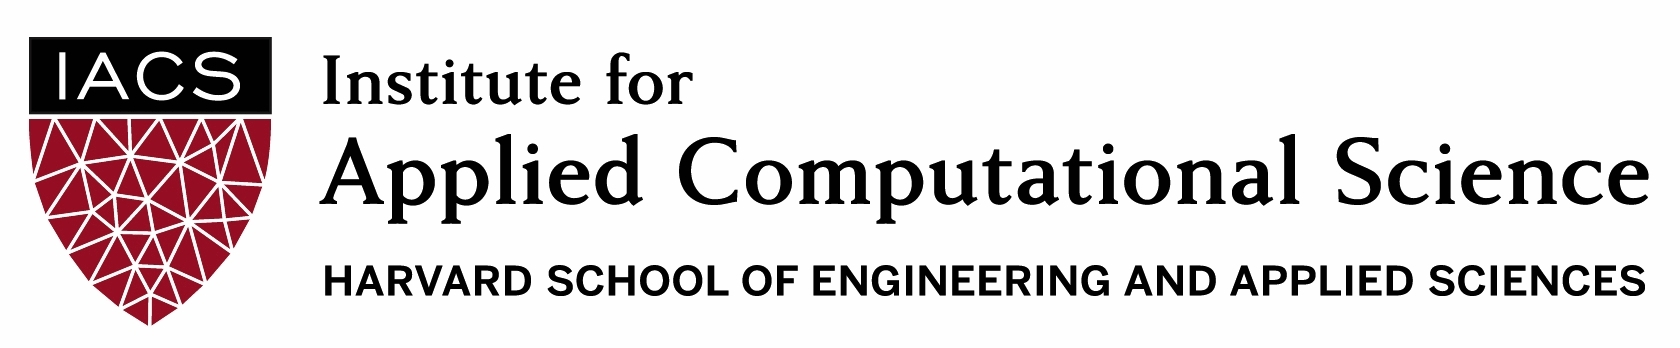

In [102]:
picture

# Feature Analysis for Time Series 

<center>**Authors:** Isadora Nun <a href="mailto:isadoranun@seas.harvard.edu">isadoranun@seas.harvard.edu</a> , Pavlos Protopapas <a href="mailto:pavlos@seas.harvard.edu">pavlos@seas.harvard.edu</a> 

**Contributors:** Karim Pichara, Rahul Dave, Daniel Acuña, Nicolás Castro, Cristobal Mackenzie, Andrés Riveros, Brandon Sim and Ming Zhu<center>

## Introduction <a name="Introduction"></a> 

A time series is a sequence of observations (data points) that are arranged based on the time of their ocurrence. The hourly measurement of wind speeds in meteorology, the minute by minute recording of electrical activity along the scalp in electroencephalography, the weekly changes of stock prices in finances, are just some examples among many others. 

Some of the main properties one would expect to find in a time series are [1]:
- the data is not generated independently
- their dispersion varies in time
- they are often governed by a trend and they have cyclic components

The study and analysis of time series can have multiple ends: get a better understanding of the mechanism generating the data, predict future outcomes and behaviours, classification and characterization of events, etc. 

In [103]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


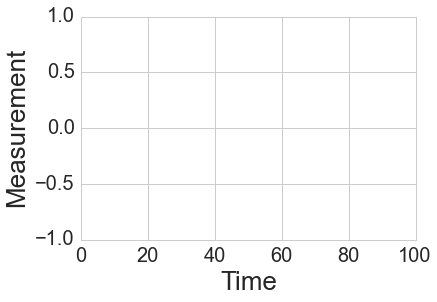

In [104]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
import pandas as pd

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(-1, 1))
Color = [ 1 ,0.498039, 0.313725];
line, = ax.plot([], [], '*',color = Color)
plt.xlabel("Time")
plt.ylabel("Measurement")
# ax.axes.get_xaxis().set_ticks([])
# ax.axes.get_yaxis().set_ticks([])


# x = np.linspace(0, 100, 100)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, i+1, i+1)
#     ts = pd.Series(np.random.normal(size=i+1, loc=4, scale=2.0), index=pd.date_range('1/1/2000', periods=100))
    ts = 5*np.cos(x * 0.02 * np.pi) * np.sin(np.cos(x)  * 0.02 * np.pi)
#     line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    line.set_data(x, ts)
    return line,



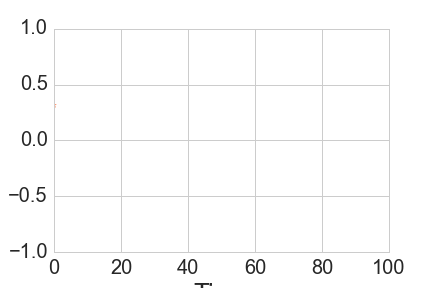
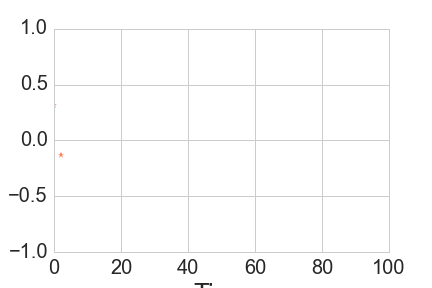
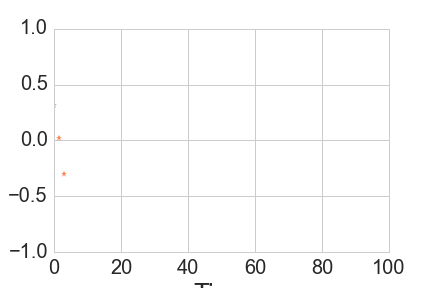
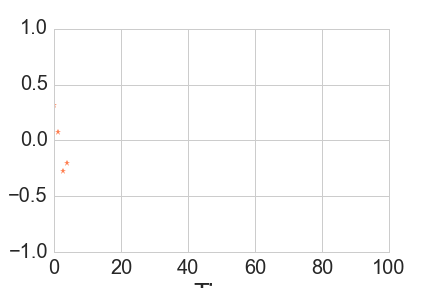
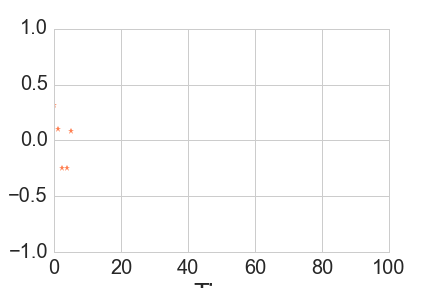
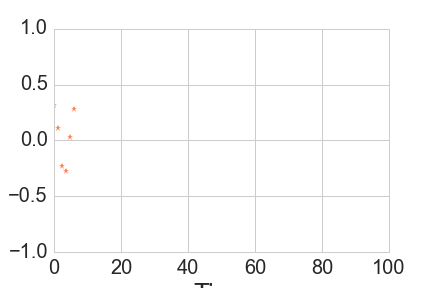
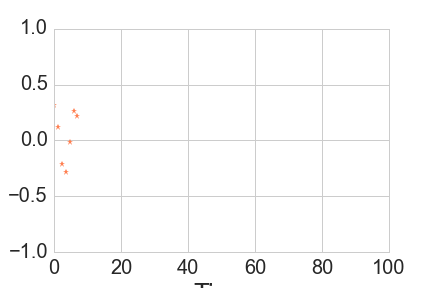
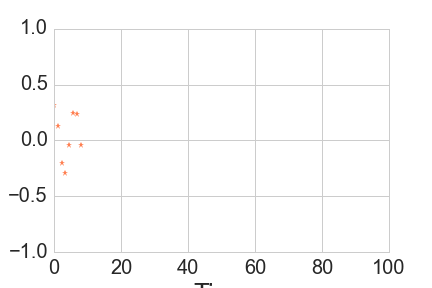
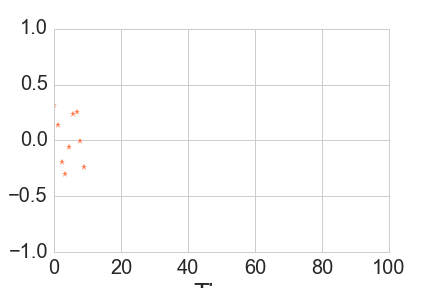
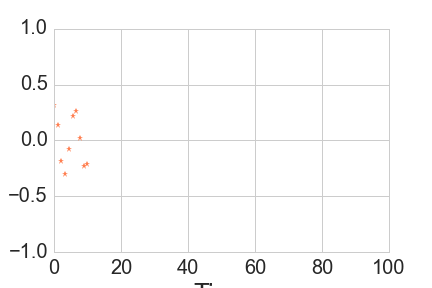
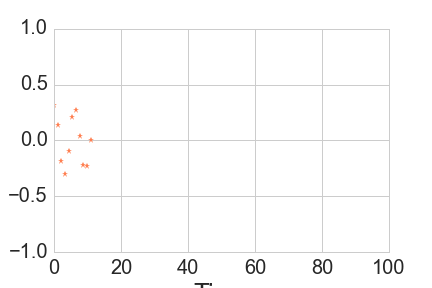
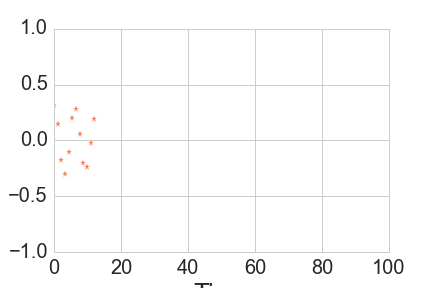
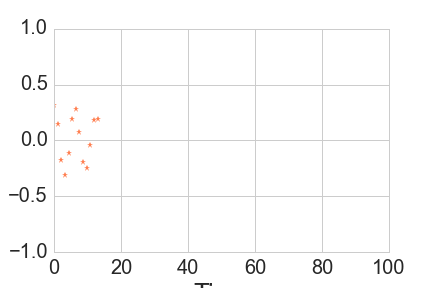
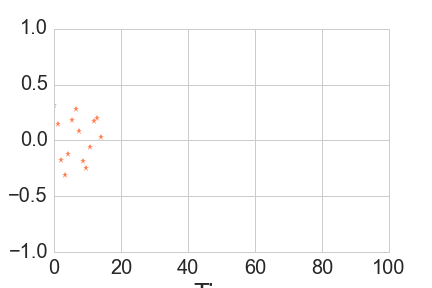
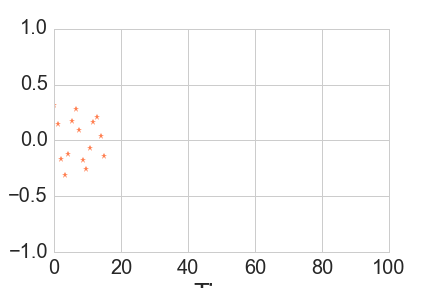
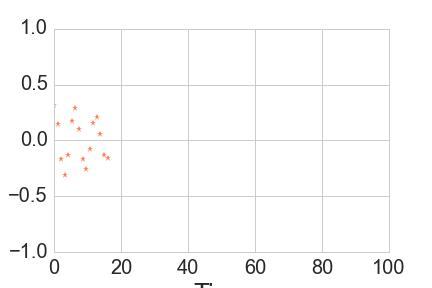
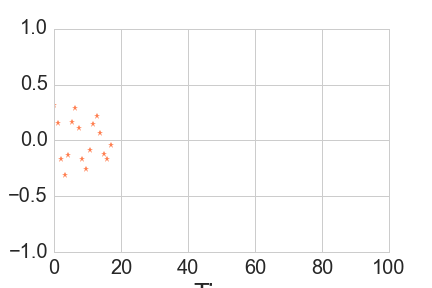
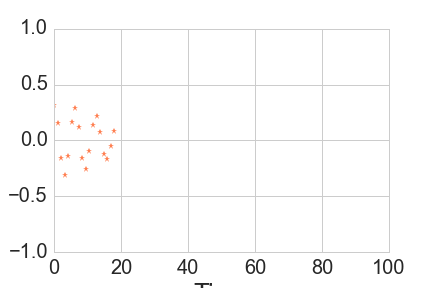
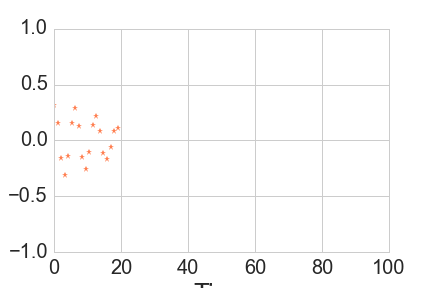
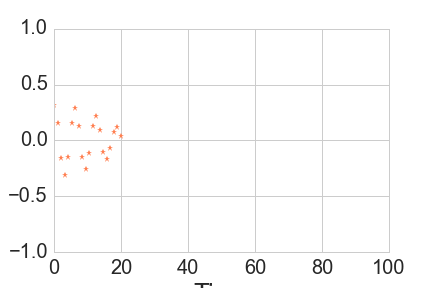
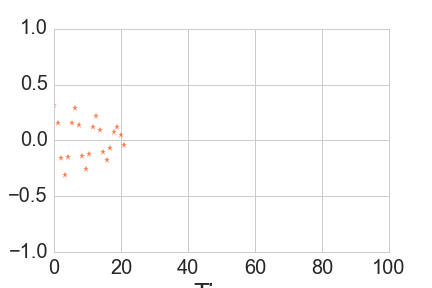
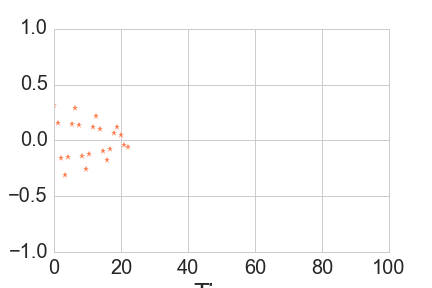
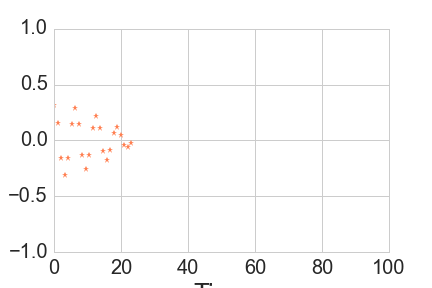
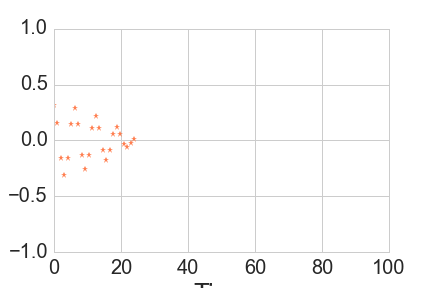
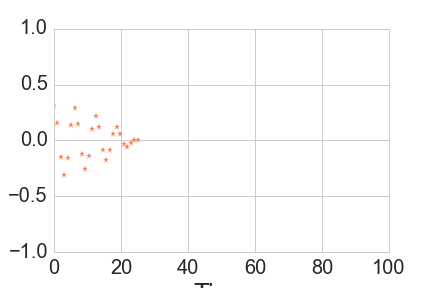
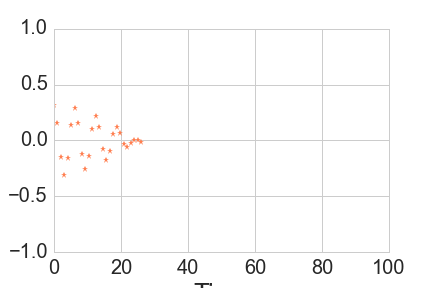
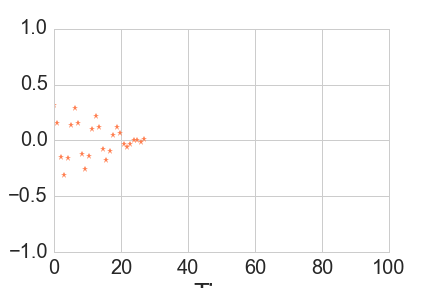
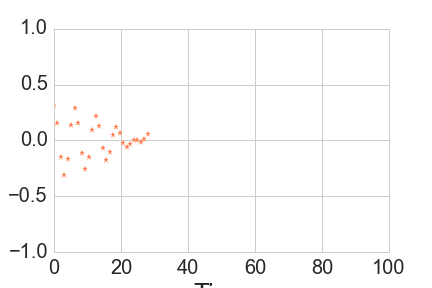
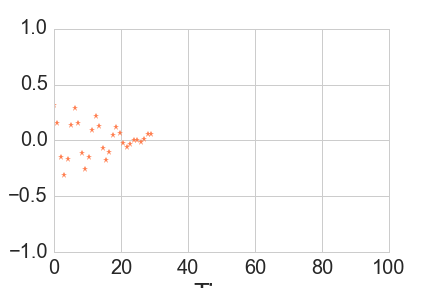
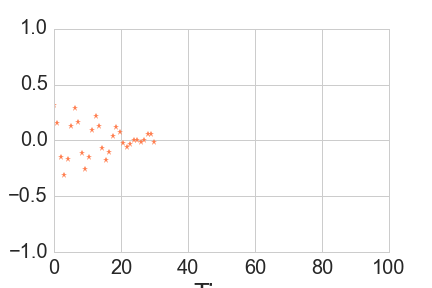
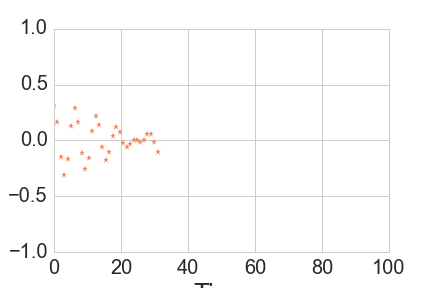
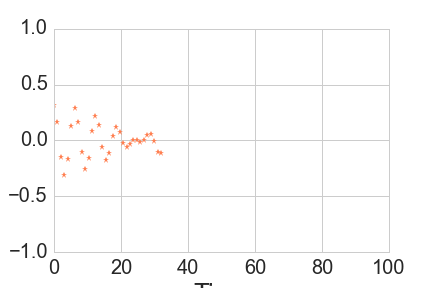
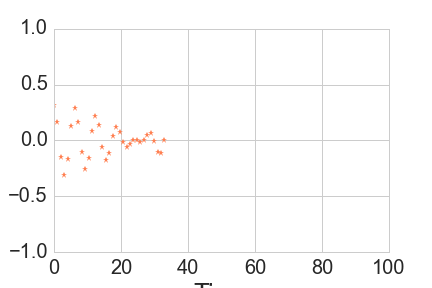
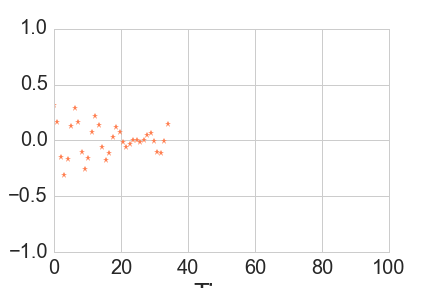
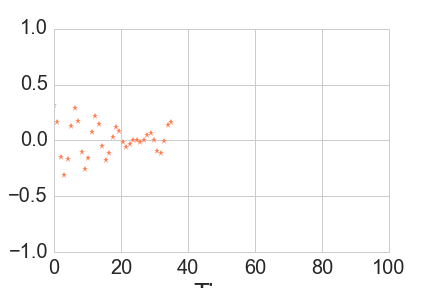
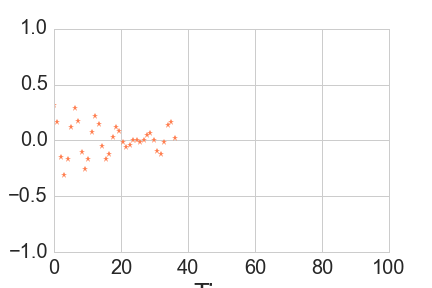
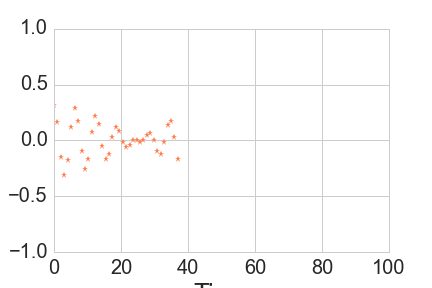
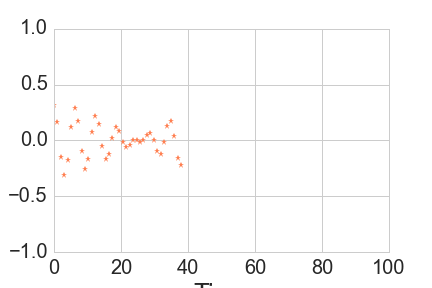
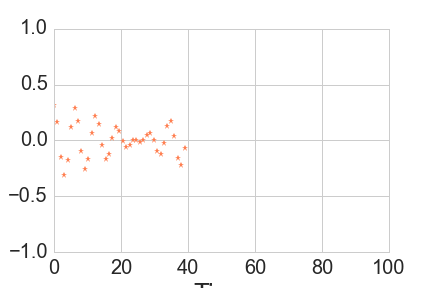
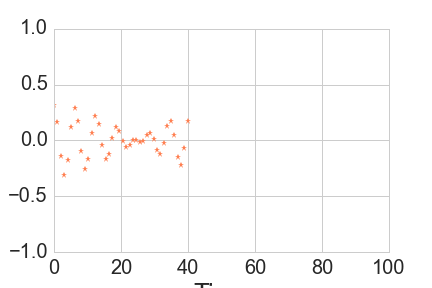
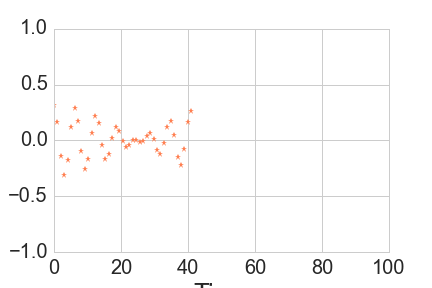
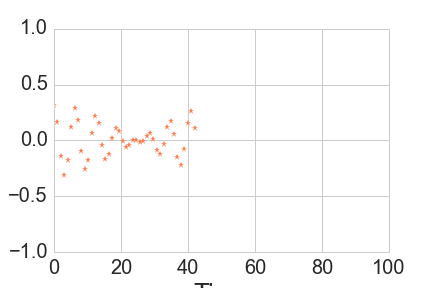
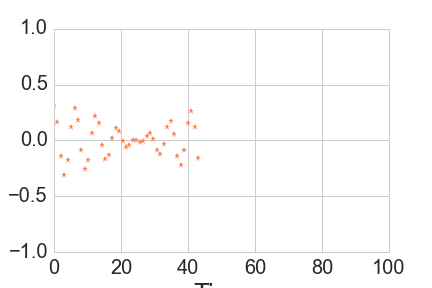
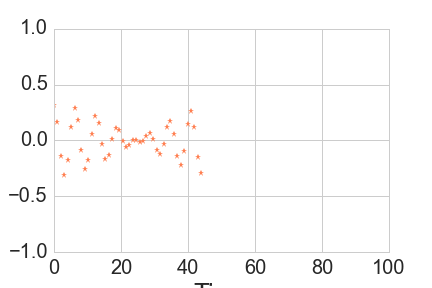
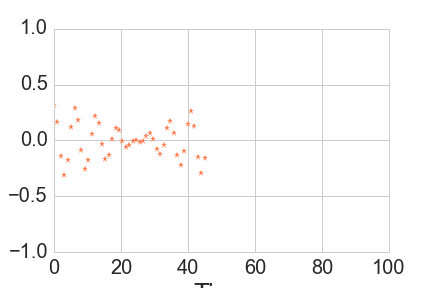
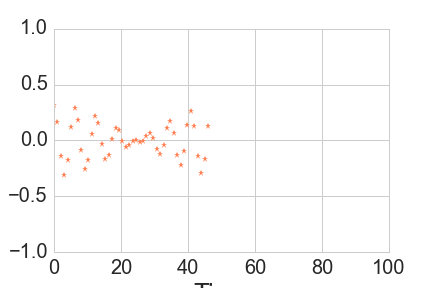
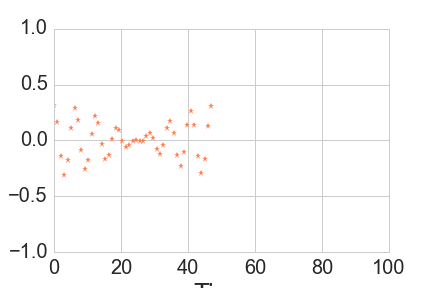
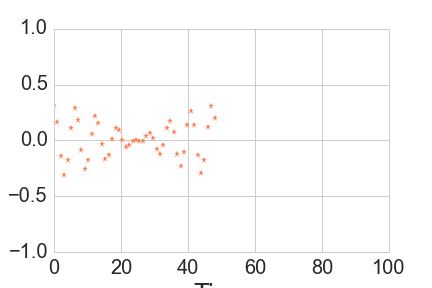
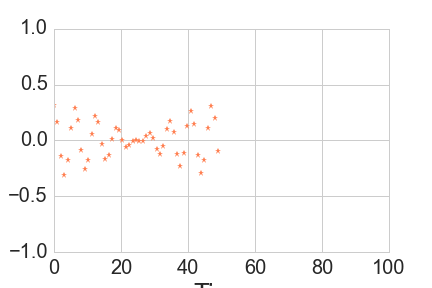
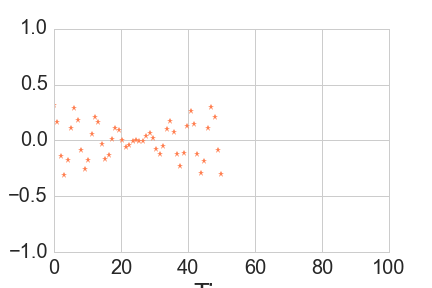
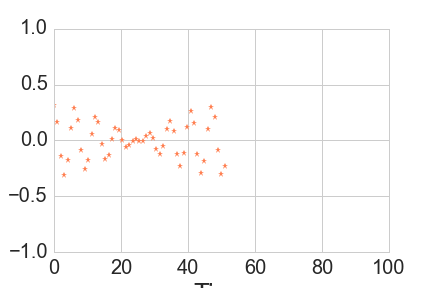
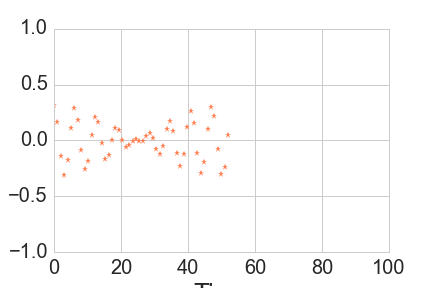
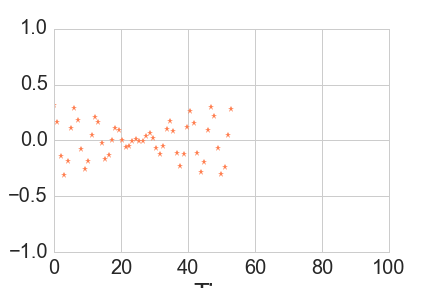
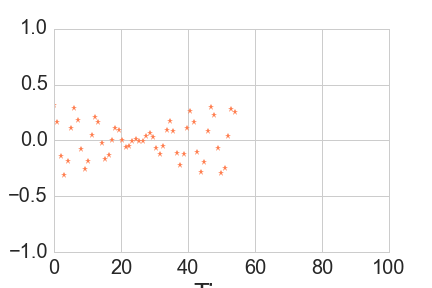
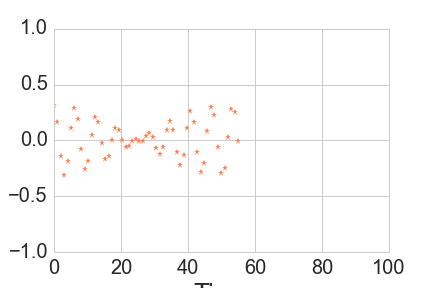
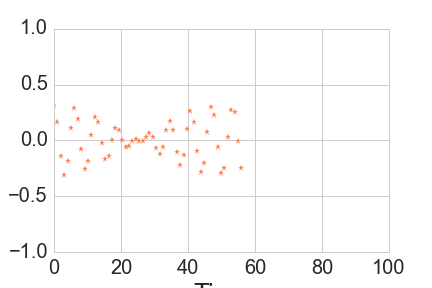
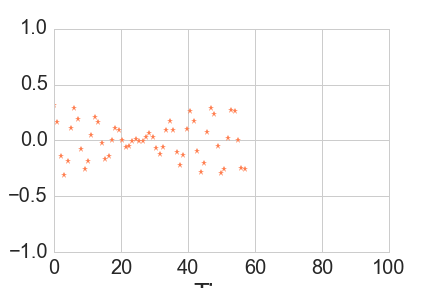
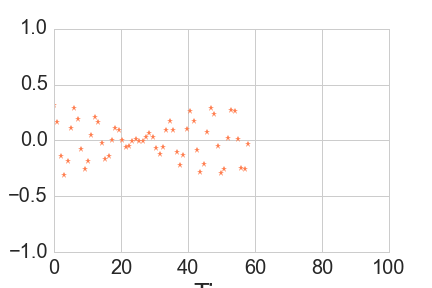
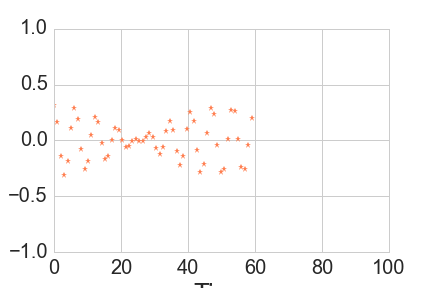
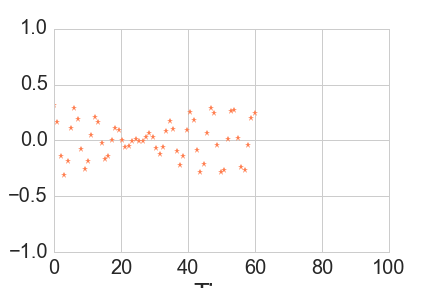
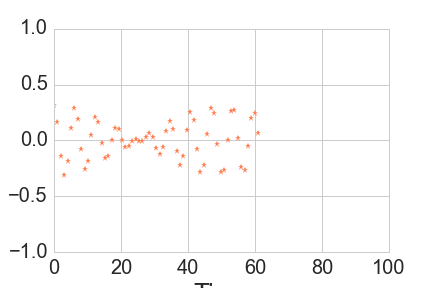
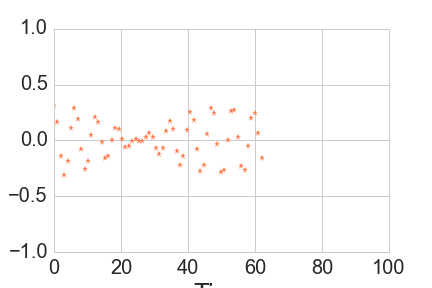
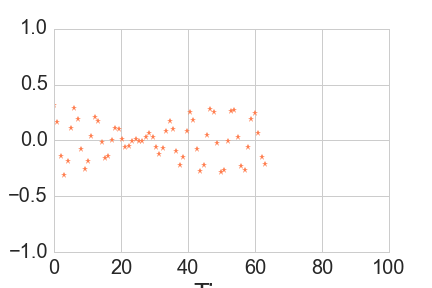
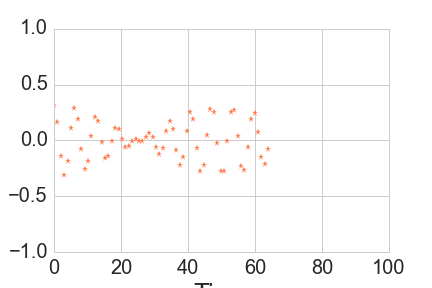
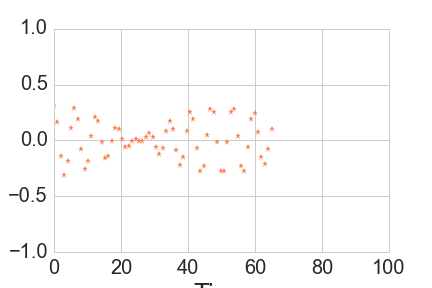
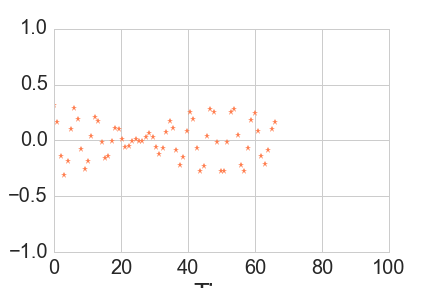
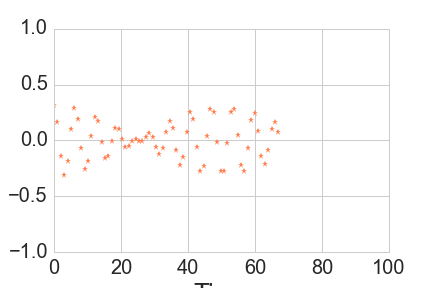
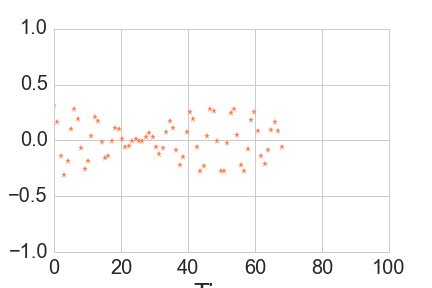
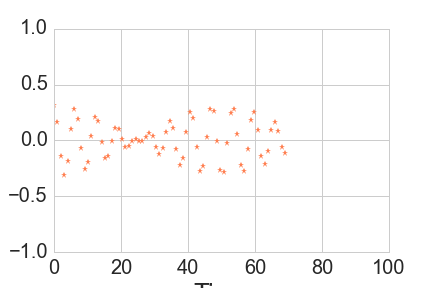
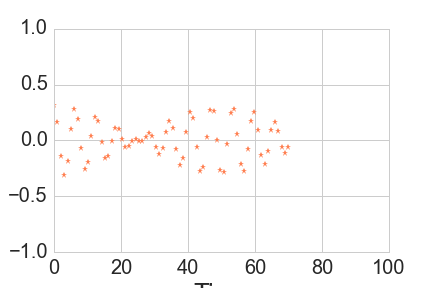
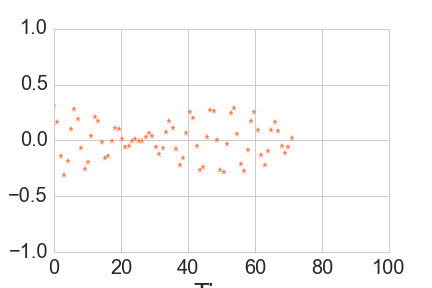
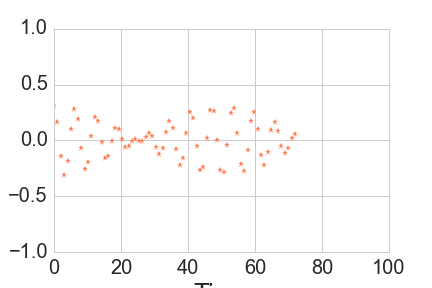
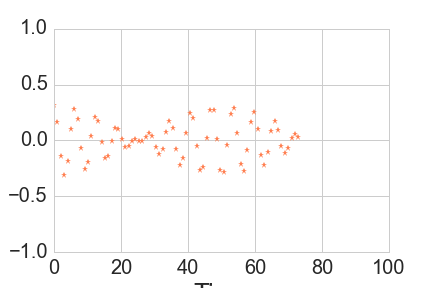
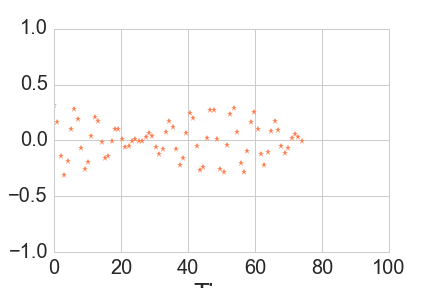
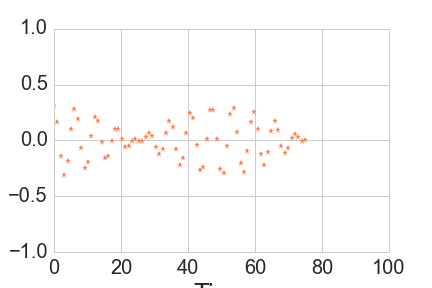
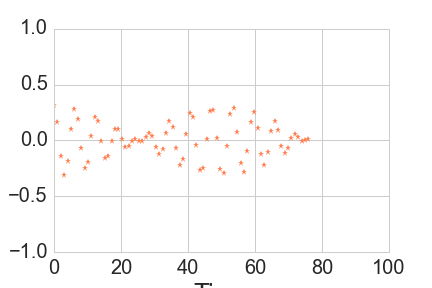
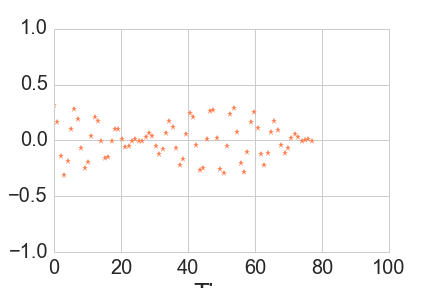
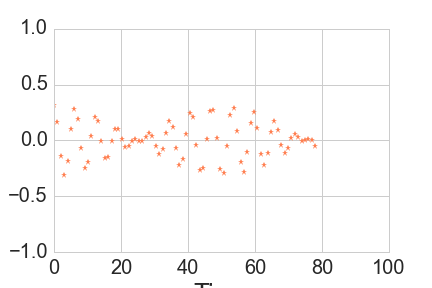
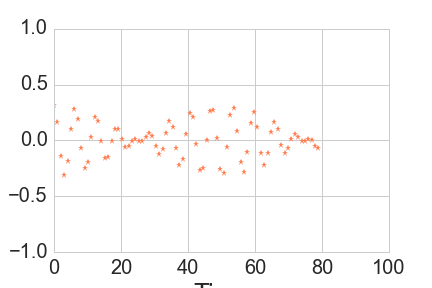
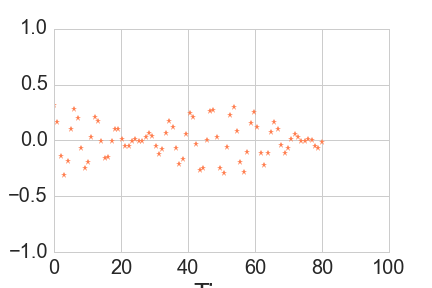
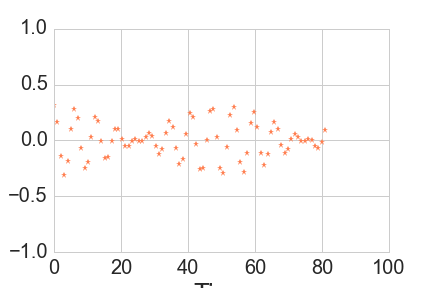
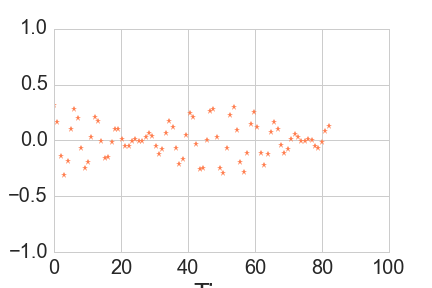
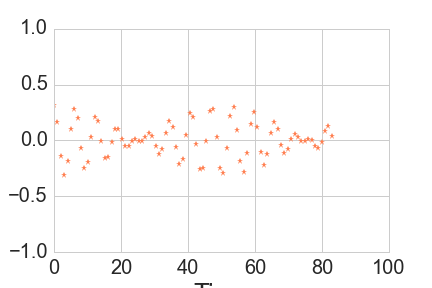
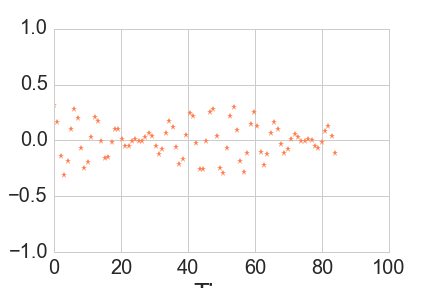
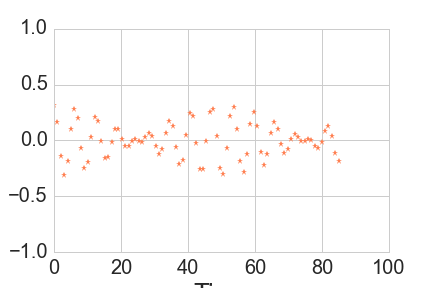
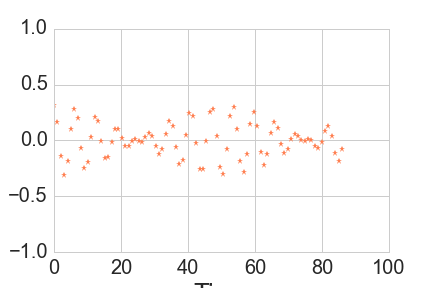
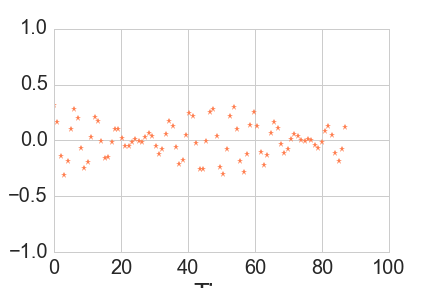
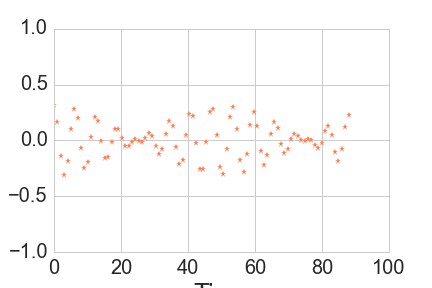
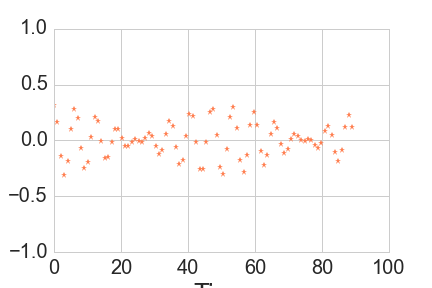
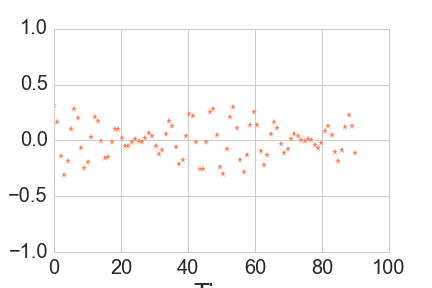
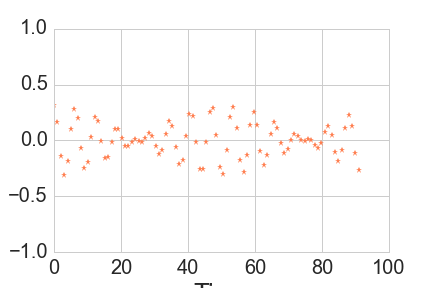
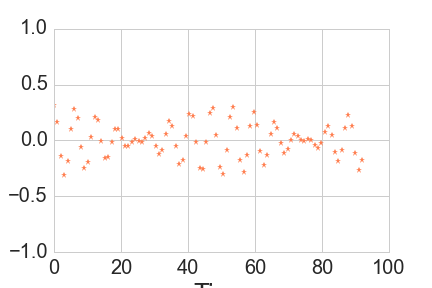
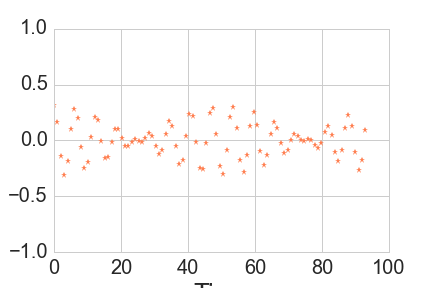
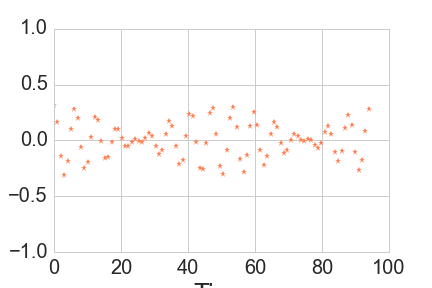
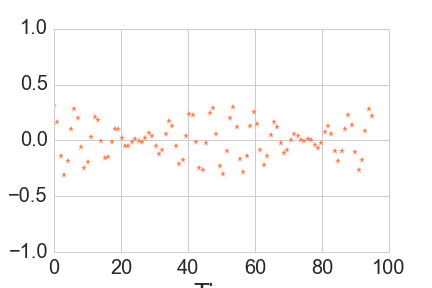
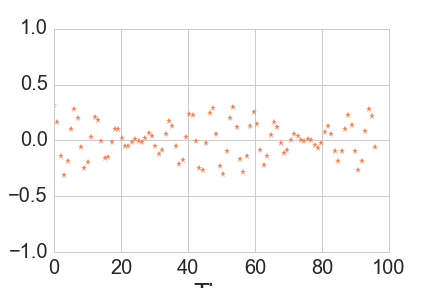
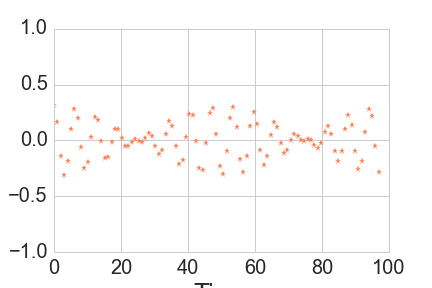
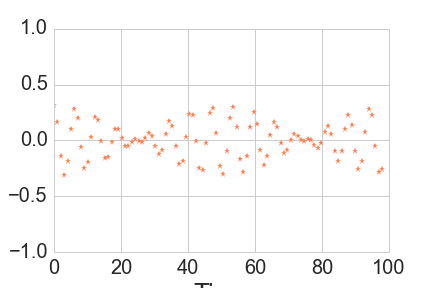
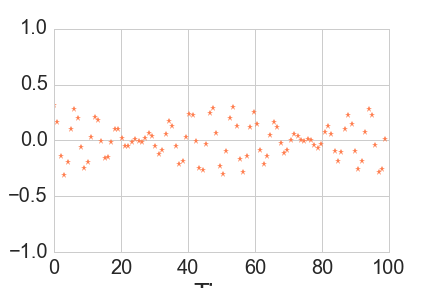
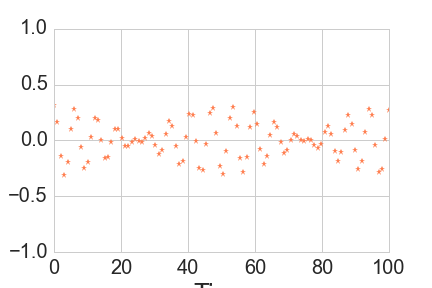

In [105]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=200, blit=True)

In time-domain astronomy, data gathered from the telescopes is usually represented in the form of light-curves. These are time series that show the brightness variation of an object through a period of time (for a visual representation see video below).  Based on the variability characteristics of the light-curves, celestial objects can be classified into different groups (quasars, long period variables, eclipsing binaries, etc.) and consequently be studied in depth independently. 

In order to characterize this variability, some of the existing methods use machine learning algorithms that build their decision on the light-curves features. Features, the topic of the following work, are numerical descriptors that aim to characterize and distinguish the different variability classes. They can go from basic statistical measures such as the mean or the standard deviation, to complex time-series characteristics such as the autocorrelation function. 

In this document we present a library with a compilation of some of the existing light-curve features. The main goal is to create a collaborative and open tool where every user can characterize or analyze an astronomical photometric database while also contributing to the library by adding new features. However, it is important to highlight that this library is not restricted to the astronomical field and could also be applied to any kind of time series.
 
Our vision is to be capable of analyzing and comparing light-curves from all the available astronomical catalogs in a standard and universal way. This would facilitate and make more efficient tasks as modeling, classification, data cleaning, outlier detection and data analysis in general. Consequently, when studying light-curves, astronomers and data analysts would be on the same wavelength and would not have the necessity to find a way of comparing or matching different features. 
In order to achieve this goal, the library should be run in every existent survey (MACHO, EROS, OGLE, Catalina, Pan-STARRS, etc) and future surveys (LSST) and the results should be ideally shared in the same open way as this library. 

The way a user can contribute to the library as well as every feature that we have developed so far are explained throughout this document. A Readme file is also available in case of needing extra information. 

###### Video 1: Light-Curve of Triple Star

The video below shows how data from the brightness intensity of a star through time results on a light-curve. In this particular case we are observing a complex triple system in which three stars have mutual eclipses as each of the stars gets behind or in front of the others.

In [106]:
from IPython.display import YouTubeVideo
YouTubeVideo('qMx4ozpSRuE',  width=750, height=360, align='right')

The following figure [5] presents example light-curves of each class in the MACHO survey. The x-axis is the modified Julian Date (MJD), and the y-axis is the MACHO B-magnitude.

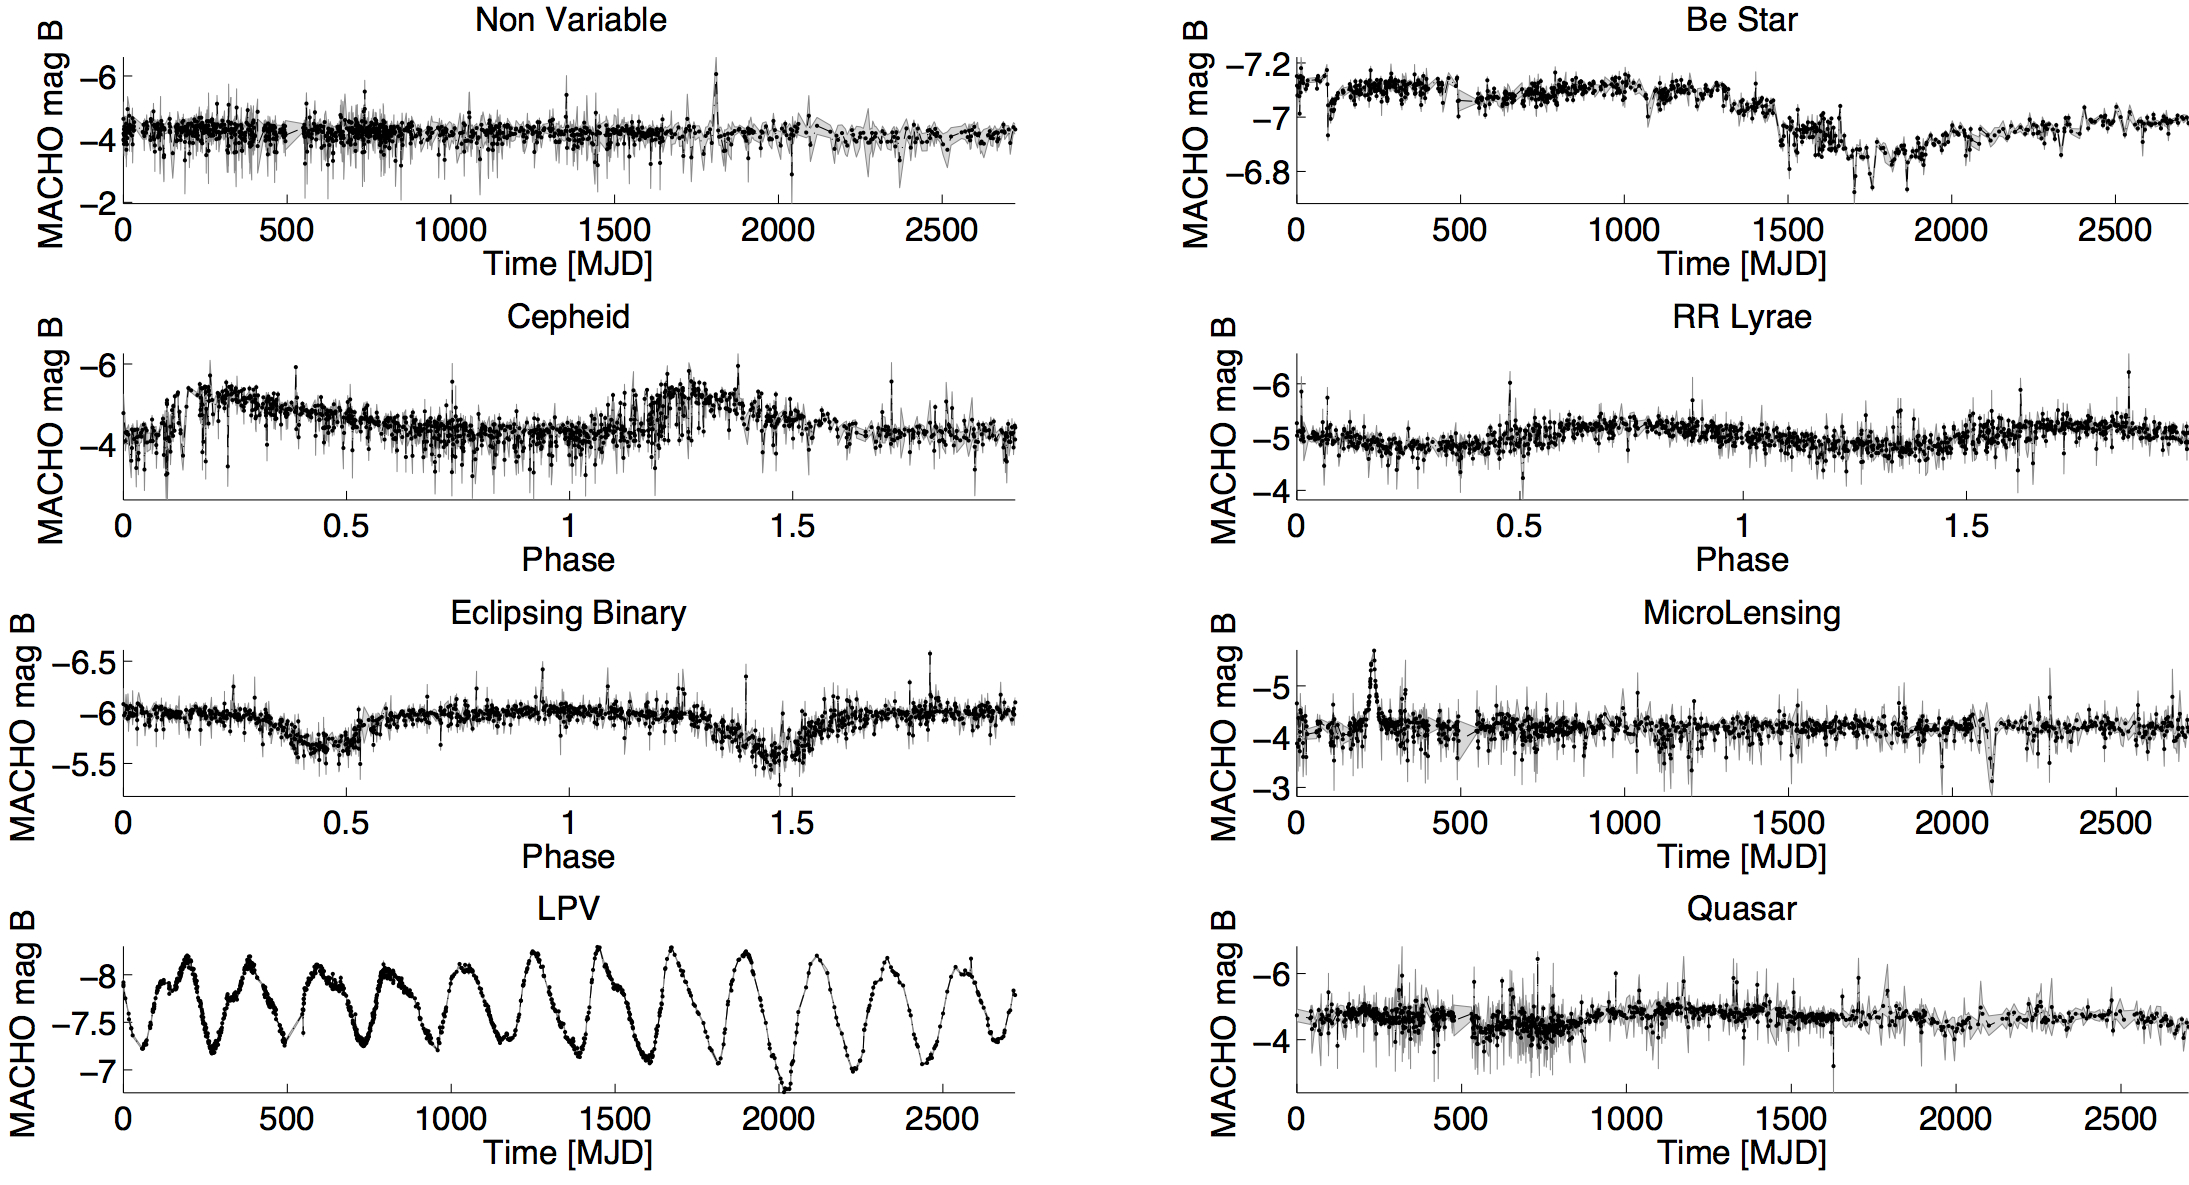

In [107]:
picture = Image(filename='curvas_ejemplos11.jpg',  width=950)
#picture.size = (0.15, 0.01)
picture

###### Figure 1: Some variability classes

## The library

### How to cite FATS

The user can cite this library by:
- making reference to the arXiv article available in http://arxiv.org/abs/1506.00010 
- directly using the Bibtex entry in http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2015arXiv150600010N&data_type=BIBTEX&db_key=PRE&nocookieset=1. 

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsaplots
from  statsmodels.tsa import stattools
import pandas as pd
from create_table import Table
import FATS

In [109]:
#We open the ligth curve in two different bands
lc_B = FATS.ReadLC_MACHO('lc_1.3444.614.B.mjd') #1.3320.14 #58.6272.729 1.3444.614 1.4652.1527
lc_R = FATS.ReadLC_MACHO('lc_1.3444.614.R.mjd')

#We import the data
[mag, time, error] = lc_B.ReadLC()
[mag2, time2, error2] = lc_R.ReadLC()

#We preprocess the data
preproccesed_data = FATS.Preprocess_LC(mag, time, error)
[mag, time, error] = preproccesed_data.Preprocess()

preproccesed_data = FATS.Preprocess_LC(mag2, time2, error2)
[mag2, time2, error2] = preproccesed_data.Preprocess()

#We synchronize the data
if len(mag) != len(mag2):
    [aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2] = \
    FATS.Align_LC(time, time2, mag, mag2, error, error2)
    
lc = np.array([mag, time, error, mag2, aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2])

<a id='Vectors'></a>

### Library structure

The library is coded in python and can be downloaded for free from the github website https://github.com/isadoranun/tsfeat. The main idea is that any user can run it in its own database but can also add new features through the github system. For a quick guide on how to use github visit https://guides.github.com/activities/hello-world/.

It is also possible to obtain the library by downloading the python package from https://pypi.python.org/pypi/FATS or by directly installing it from the terminal as follows:

*$ pip install FATS*

The library receives as input the time series data and returns as output a vector with the calculated features. In order to calculate all the available features, the data should be an array containing the following vectors and in the following order:
- **magnitude**
- time
- error
- magnitude2 
- aligned magnitude
- aligned magnitude2
- aligned time
- aligned error
- aligned error2

Nevertheless, the magnitude vector is the only input strictly required by the library given that it is necessary for the calculation of all the features. The remaining vectors are optional since they are needed just by some features. In other words, if the user does not have this addtional data, it is still possible to calculate the features that do not need them. For a description of each vector see [below](#ImportLC).

This is an example of how the input could look like if you have only magnitude and time as input vectors:

In [110]:
magnitude_ex=np.random.uniform(size=30)
time_ex=np.arange(30)

In [111]:
lc_example = np.array([magnitude_ex, time_ex])
lc_example

array([[  5.49425524e-01,   5.59671401e-01,   2.18884821e-01,
          9.82732305e-01,   8.49929103e-01,   3.57718290e-01,
          5.54832555e-02,   8.77914188e-01,   1.13302820e-02,
          2.93521033e-01,   3.76151902e-01,   2.77953548e-01,
          7.86919918e-01,   7.08379290e-01,   2.50330551e-01,
          8.06632877e-01,   8.10804863e-02,   7.98766761e-01,
          7.85619688e-01,   1.74486315e-02,   4.26125813e-01,
          5.94967889e-01,   3.40628029e-01,   5.77291743e-01,
          3.48203755e-01,   3.54507535e-01,   9.50243028e-01,
          6.56421309e-01,   6.59394445e-01,   4.11229342e-01],
       [  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   7.00000000e+00,   8.00000000e+00,
          9.00000000e+00,   1.00000000e+01,   1.10000000e+01,
          1.20000000e+01,   1.30000000e+01,   1.40000000e+01,
          1.50000000e+01,   1.60000000e+01,   1.70000000e+01,
       

The library structure is divided into two main parts. Part one: *Feature.py*, is a wrapper class that allows the user to select the features to be calculated based on the available time series vectors or to specify a list of features. Part two: *FeatureFunciontLib.py*, contains the actual code for calculating the features. Each feature has its own class with at least two functions:

**init:** receives the necessary parameters (when needed) for the feature calculation. It also defines the required vectors for the computation (e.g. magnitude and time). 

**fit:**  returns the calculated feature. The output can only take one value; features like the autocorrelation function must consequently be summarized in one single scalar.

The following code is an example of a class in *FeatureFunciontLib.py* that calculates the slope of a linear fit to the light-curve:

class LinearTrend(Base):

    def __init__(self):
        self.Data=['magnitude','time']

    def fit(self,data):
        
        magnitude = data[0]
        time = data[1]
        regression_slope = stats.linregress(time, magnitude)[0]

        return regression_slope
        
If the user wants to contribute with feature(s) to the library, it (they) must be added to *FeatureFunctionLib.py* following the explained format. There is no need to modify *Feature.py*. The user should also add a validity test to the unit test file (see explanation [further down](#UnitTest)).

### Choosing the features

The library  allows the user to either choose the specific features of interest to be calculated or to calculate them all simultaneously. Nevertheless, as already mentioned, the features are divided depending on the input data  needed for their computation (magnitude, time, error, second data, etc.), this will be used as an automatic selection parameter. For example, if the user wants to calculate all the available features but he/she only has the vectors *magnitude* and *time*, solely the features that need *magnitude*, *time* or *magnitude* and *time* as an input will be computed.

**Note:** some features depend on other features and consequently must be computed together. For instance, *Period_fit* returns the false alarm probability of the estimated period. It is necessary then to calculate also the period *PeriodLS*.

The list of all the possible features with their corresponding input data, additional parameters and literature source is presented in the following table: 

In [112]:
from ipy_table import *
FeaturesList = [['Feature','Depends on feature','Input data (besides magnitude)', 'Parameters','Def', 'Bib'],['Amplitude','' ,'','','', 7],['Anderson-Darling test','','','','', 2] ,['Autocor_length','','','Number of lags','100',3],['Beyond1Std','','error','','', 7],['CAR_mean', 'CAR_sigma', 'time, error', '','',6],['CAR_sigma','',  'time, error', '','',6],  ['CAR_tau', 'CAR_sigma', 'time, error', '','',6], ['Color','','mag2','','',3],['Con','','','Consecutive stars',3,3],['Eta_color','','aligned_mag, aligned_mag2, aligned_time','','',4],['Eta_e','','time','','',4],['FluxPercentileRatioMid20','','','','', 7],['FluxPercentileRatioMid35','','','','', 7],['FluxPercentileRatioMid50','','','','', 7],['FluxPercentileRatioMid65','','',' ',' ', 7],['FluxPercentileRatioMid80','','',' ',' ', 7],['Freq1_harmonics_amplitude_0','','time','','', 7],['Freq{i}_harmonics_amplitude_{j}','Freq1_harmonics_amplitude_0','time','','', 7],['Freq{i}_harmonics_rel_phase_{j}','Freq1_harmonics_amplitude_0','time','','', 7],['LinearTrend','','time',' ',' ', 7],['MaxSlope','','time',' ',' ', 7], ['Mean','','',' ',' ',4],['Meanvariance','','',' ',' ',3], ['MedianAbsDev','','',' ',' ', 7],['MedianBRP','','',' ',' ', 7],['PairSlopeTrend','','',' ',' ', 7],['PercentAmplitude','','',' ',' ', 7],['PercentDifferenceFluxPercentile','','',' ',' ', 7],['PeriodLS','','time','Oversampling factor ',6,3],['Period_fit','PeriodLS', 'time ',' ',' ',3],['Psi_CS','PeriodLS','time',' ',' ',4],['Psi_eta','PeriodLS','time',' ',' ',4],['Q31','','',' ',' ',4],['Q31_color','','aligned_mag, aligned_mag2',' ',' ',4],['Rcs','','',' ',' ',3],['Skew','','',' ',' ', 7], ['SlottedA_length','','time','Slot size T (days)',4,'?'],['SmallKurtosis','','',' ',' ', 7],['Std','' ,'','','', 7],['StetsonJ','','aligned_mag, aligned_mag2, aligned_error, aligned_error2','','', 7],['StetsonK','','error','','', 7], ['StetsonK_AC','SlottedA_length','','','',3],['StetsonL','','aligned_mag, aligned_mag2, aligned_error, aligned_error2','','',3],['VariablityIndex','','','','',3]];

In [113]:
make_table(FeaturesList)
apply_theme('basic')
set_global_style(float_format='%0.3E')

Feature,Depends on feature,Input data (besides magnitude),Parameters,Def,Bib
Amplitude,,,,,7
Anderson-Darling test,,,,,2
Autocor_length,,,Number of lags,100,3
Beyond1Std,,error,,,7
CAR_mean,CAR_sigma,"time, error",,,6
CAR_sigma,,"time, error",,,6
CAR_tau,CAR_sigma,"time, error",,,6
Color,,mag2,,,3
Con,,,Consecutive stars,3,3
Eta_color,,"aligned_mag, aligned_mag2, aligned_time",,,4


Some examples of how to choose the features from the library to be calculated are presented next: 

#### - List of features as an input:

The user should add *featureList = * and next provide the features to be calculated as a list (between square brackets). In the following case we aim to calculate the Standard deviation and Stetson L of the data:

In [141]:
a = FATS.FeatureSpace(featureList=['Std','StetsonL'])
a=a.calculateFeature(lc)

Table(a)

Feature,Value
Std,0.35804
StetsonL,1.70977


#### - Available data as an input:

In case the user does not have the seven input vectors mentioned  [above](#Vectors), it is necessary to specify the available  data by adding *Data =*  followed by the list of vectors between brackets. In the example below we calculate all the features that can be computed with the *magnitude* and *time* as an input.

In [115]:
a = FATS.FeatureSpace(Data=['magnitude','time'])
a=a.calculateFeature(lc)

Table(a)

Feature,Value
Amplitude,0.26500
AndersonDarling,1.00000
Autocor_length,1.00000
Con,0.00000
Eta_e,905.63620
FluxPercentileRatioMid20,0.09131
FluxPercentileRatioMid35,0.17817
FluxPercentileRatioMid50,0.31626
FluxPercentileRatioMid65,0.52339
FluxPercentileRatioMid80,0.79955


#### - List of features and available data as an input:

It is also an option to provide the available time series input vectors and calculate with this data all the possible features from a feature list:

In [116]:
a = FATS.FeatureSpace(featureList=['Mean','Beyond1Std','CAR_sigma','Color','SlottedA_length'], Data=['magnitude', 'error']) 
a=a.calculateFeature(lc)

Table(a)

Feature,Value
Mean,-5.91799
Beyond1Std,0.22278


#### - Excluding list as an input

The user can also create a list of features to be excluded from the calculation. To do so, *excludeList=* must be added followed by the list between brackets. This would imply that every possible feature will be calculated except those in the excluding list.

In [117]:
a = FATS.FeatureSpace(Data= ['magnitude', 'time'], excludeList = ['SlottedA_length','StetsonK_AC','PeriodLS'])
a = a.calculateFeature(lc)

Table(a)

Feature,Value
Amplitude,0.26500
AndersonDarling,1.00000
Autocor_length,1.00000
Con,0.00000
Eta_e,905.63620
FluxPercentileRatioMid20,0.09131
FluxPercentileRatioMid35,0.17817
FluxPercentileRatioMid50,0.31626
FluxPercentileRatioMid65,0.52339
FluxPercentileRatioMid80,0.79955


#### - All the features:

To calculate all the existent features in the library, the user should add *Data='all'* followed by *featureList = None* as shown in the next example. Obviously, in order to do this, the user must have provided all the needed time series input vectors.

In [118]:
a = FATS.FeatureSpace(Data='all', featureList=None) 
a=a.calculateFeature(lc)

Table(a)

Feature,Value
Amplitude,0.26500
AndersonDarling,1.00000
Autocor_length,1.00000
Beyond1Std,0.22278
CAR_mean,-9.23070
CAR_sigma,-0.21928
CAR_tau,0.64112
Color,-0.33326
Con,0.00000
Eta_color,12930.68526


### Library output

When calculating the features of a light-curve, the output can be returned in three different formats:
- "dict": returns a vector with the name of each feature followed by its value.
- "array": returns a vector with only the features values.
- "features" : returns a vector with the list of the calculated features.

The following example shows how to implement the first option:

In [119]:
a.result(method='dict')

{'Amplitude': 0.26500000000000057,
 'AndersonDarling': 1.0,
 'Autocor_length': 1.0,
 'Beyond1Std': 0.22278056951423786,
 'CAR_mean': -9.230698873903961,
 'CAR_sigma': -0.21928049298842511,
 'CAR_tau': 0.64112037377348619,
 'Color': -0.33325502453332145,
 'Con': 0.0,
 'Eta_color': 12930.685257570141,
 'Eta_e': 905.63620081228805,
 'FluxPercentileRatioMid20': 0.091314031180401739,
 'FluxPercentileRatioMid35': 0.1781737193763922,
 'FluxPercentileRatioMid50': 0.3162583518930947,
 'FluxPercentileRatioMid65': 0.52338530066815037,
 'FluxPercentileRatioMid80': 0.79955456570155925,
 'Freq1_harmonics_amplitude_0': 0.13437970279331715,
 'Freq1_harmonics_amplitude_1': 0.081782103003790088,
 'Freq1_harmonics_amplitude_2': 0.05087059528477509,
 'Freq1_harmonics_amplitude_3': 0.026198886048114284,
 'Freq1_harmonics_rel_phase_0': 0.0,
 'Freq1_harmonics_rel_phase_1': 0.35898717688700943,
 'Freq1_harmonics_rel_phase_2': 0.7837375001939666,
 'Freq1_harmonics_rel_phase_3': 1.3148410684236285,
 'Freq2_harm

<a id='UnitTest'></a>

### Unit test

In order to check systematically the validity of the features, a test is created for each one of them in a unit test file called "test_library.py". This script should be always run before using the library by executing $ py.test. Also, if the user contributes with a new feature for the library, a pertinent test should be added to the unit test file. The idea is to guarantee, as far as possible,  that every feature calculated is correct. In most of the cases this can be reached by calculating the expected feature value for a known distribution (normal, uniform, etc) and then by checking it with the value obtained from the library.

The following image shows how py.test output should look if all the tests are passed:

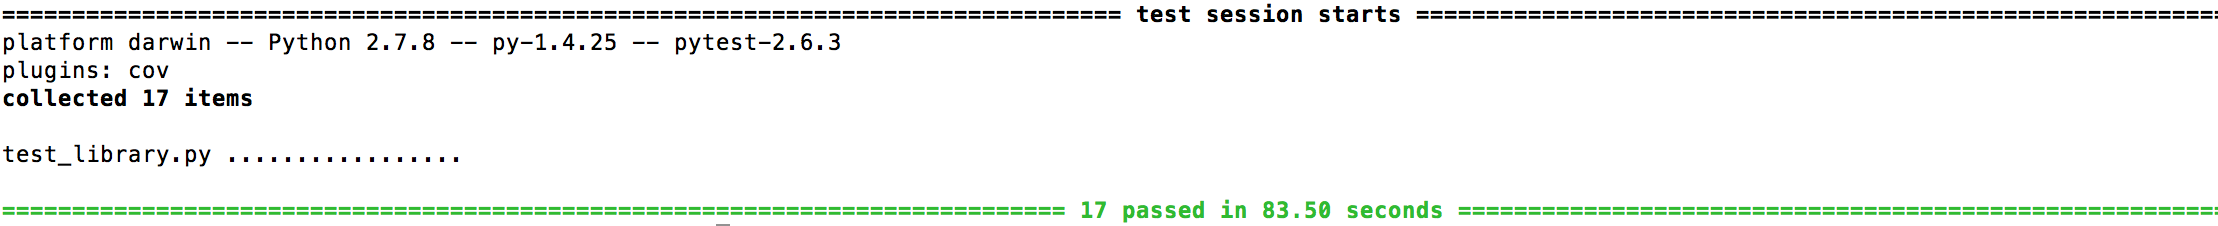

In [120]:
Image(filename='unit2.png' , width=950)

<a id='ImportLC'></a>

### Importing light-curves Toolbox

In addition to the features library, we provide a basic toolbox for importing and preprocessing the data. For every feature in the library to be calculated, six vectors should be available per light-curve: magnitude, time of measurement and the associated observational errors, each one of them in two different bands.

For example, the function ReadLC_MACHO() receives a MACHO id (object id assigned in the MACHO survey) as an input and returns the following output:
- **mag**: magnitude measurement 
- **time**: time of measurement 
- **error**: associated observational error 

A demonstration of how to import a MACHO light-curve is presented below. Besides opening the file, the data is:
- preprocessed: points within 5 standard deviations from the mean are considered as noise and thus are eliminated. 
- synchronized: when observed in different bands, light-curves of a same object are not always monitored for the same time length and at the same precise times. For some features, it is important to align the light-curves and to only consider the simultaneous measurements from both bands. This correspond to the previous mentioned vectors **aligned_mag, aligned_mag2, aligned_time, aligned error** and **aligned_error2**.

Note: mag, time and error must have the same lenght as well as aligned_mag, aligned_mag2, aligned_time, aligned_error and aligned_error2.

In [140]:
#We open the ligth curve in two different bands
lc_B = FATS.ReadLC_MACHO('lc_58.6272.729.B.mjd')   #1.3320.14 #58.6272.729 1.3444.614 1.4652.1527
lc_R = FATS.ReadLC_MACHO('lc_58.6272.729.R.mjd')

#We import the data
[mag, time, error] = lc_B.ReadLC()
[mag2, time2, error2] = lc_R.ReadLC()

#We preprocess the data
preproccesed_data = FATS.Preprocess_LC(mag, time, error)
[mag, time, error] = preproccesed_data.Preprocess()

preproccesed_data = FATS.Preprocess_LC(mag2, time2, error2)
[mag2, time2, error2] = preproccesed_data.Preprocess()

#We synchronize the data
if len(mag) != len(mag2):
    [aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2] = \
    FATS.Align_LC(time, time2, mag, mag2, error, error2)
    
lc = np.array([mag, time, error, mag2, aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2])

It is sometimes helpful to visualize the data before processing it. For a representation of the light curve, we can plot it as follows: 

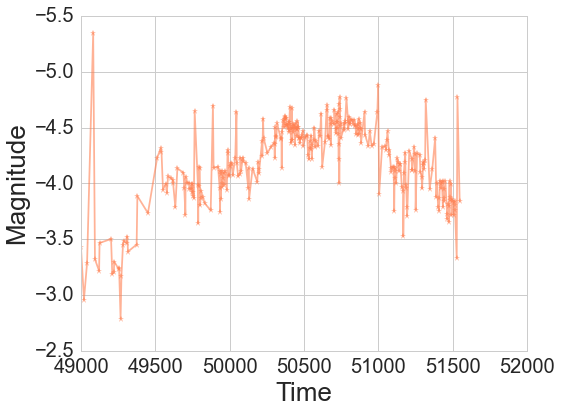

In [122]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
Color = [ 1 ,0.498039, 0.313725];
p = plt.plot(time, mag, '*-', color=Color, alpha = 0.6)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

<a id='foldedLC'></a>

Note: for periodic light-curves we are able to transform the photometric time
series into a single light-curve in which each period is mapped onto the same time axis as follows:
$$ t'=\{\frac{t-t_0}{T}\} $$

where $T$ is the period, $t_0$ is an arbitrary starting point and the symbol {} represents the non-integer part of the fraction. This process produces a folded light-curve on an x-axis of
folded time that ranges from 0 to 1. The corresponding folded light-curve of the previous example is shown next:

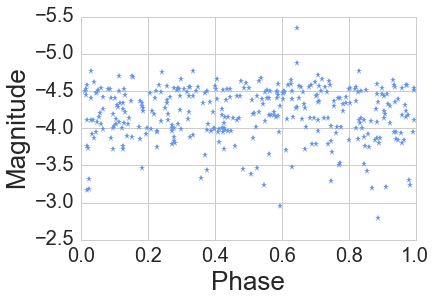

In [123]:
Color = [ 0.392157, 0.584314 ,0.929412];
T = 2 * 0.93697
new_b=np.mod(time, T) / T;
idx=np.argsort(2*new_b)
plt.plot( new_b, mag, '*', color = Color)
plt.xlabel("Phase")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

## The features

The next section details the features that we have developed in order to represent the light-curves. 
Every feature is described and tested with a suitable experiment to prove its validity. 

Note: Each feature was also tested to check its invariance to unequal sampling. This refers to the fact that the telescope observations are not always taken at uniformly spaced intervals. Evidently, light-curve descriptors should be insensitive to this nonuniformity. The tests can be found in the [appendix](#Appendix) of this document. 

Let's first create some charasteristic synthetic light-curves in order to test each one of the features along the library:
- *lc_normal* : its magnitude follows a Gaussian distribution
- *lc_periodic* : its magnitude has a periodic variability
- *lc_uniform* : its magnitude follows a uniform distribution

In [124]:
mag_normal = np.random.normal(size=10000)
time_normal = np.arange(10000)
error_normal = np.random.normal(loc=1, scale =0.008, size=10000)
mag_normal2 = np.random.normal(size=10000)
error_normal2 = np.random.normal(loc=1, scale =0.008, size=10000)
aligned_mag_normal = mag_normal
aligned_mag_normal2 = mag_normal2
aligned_time_normal = time_normal
aligned_error_normal = error_normal
aligned_error_normal2 = error_normal2

lc_normal = np.array([mag_normal, time_normal, error_normal, mag_normal2 , aligned_mag_normal, aligned_mag_normal2, aligned_time_normal, aligned_error_normal, aligned_error_normal2])


In [125]:
N=100
time_periodic = np.arange(N)
Period = 10
cov = np.zeros([N,N])
mean = np.zeros(N)
for i in np.arange(N):
    for j in np.arange(N):
        cov[i,j] = np.exp( -(np.sin( (np.pi/Period) *(i-j))**2))
mag_periodic = np.random.multivariate_normal(mean, cov)
lc_periodic = np.array([mag_periodic, time_periodic])

/Users/isadoranun/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: covariance is not positive-semidefinite.


In [126]:
mag_uniform=np.random.uniform(size=10000)
time_uniform=np.arange(10000)
lc_uniform = np.array([mag_uniform, time_uniform])

#### Mean

Mean magnitude.
For a normal distribution it should take a value close to zero:

In [127]:
a = FATS.FeatureSpace(featureList=['Mean'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

{'Mean': -0.018089914071332463}


#### Standard deviaton

The standard deviation $\sigma$ of the sample is defined as: 

$$\sigma=\frac{1}{N-1}\sum_{i} (y_{i}-\hat{y})^2$$

For example, a white noise time serie should have $\sigma=1$

In [128]:
a = FATS.FeatureSpace(featureList=['Std' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

{'Std': 0.99376515412341226}


#### Range of a cumulative sum $R_{cs}$ 

$R_{cs}$ is the range of a cumulative sum (Ellaway 1978) of each light-curve and is defined as:

$$R_{cs} = max(S) - min(S)$$
$$S = \frac{1}{N \sigma} \sum_{i=1}^l \left( m_i - \bar{m} \right) $$

where max(min) is the maximum (minimum) value of S and $l=1,2, \dots, N$. 

$R_{cs}$ should take a value close to zero for a normal distribution:

In [129]:
a = FATS.FeatureSpace(featureList=['Rcs'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

{'Rcs': 0.016854031890238305}


#### Period Lomb-Scargle

The Lomb-Scargle (L-S) algorithm (Scargle, 1982) is a variation of the Discrete Fourier Transform (DFT), in which a time series is decomposed into a linear combination of sinusoidal functions. The basis of sinusoidal functions transforms the data from the time domain to the frequency domain. DFT techniques often assume evenly spaced data points in the time series, but this is rarely the case with astrophysical time-series data. Scargle has derived a formula for transform coefficients that is similiar to the DFT in the limit of evenly spaced observations. In addition, an adjustment of the values used to calculate the transform coefficients makes the transform invariant to time shifts.

The Lomb-Scargle periodogram is optimized to identify sinusoidal-shaped periodic signals in time-series data. Particular applications include radial velocity data and searches for pulsating variable stars. L-S is not optimal for detecting signals from transiting exoplanets, where the shape of the periodic light-curve is not sinusoidal.

Next, we perform a test on the synthetic periodic light-curve we created (which period is 20) to confirm the accuracy of the period found by the L-S method:

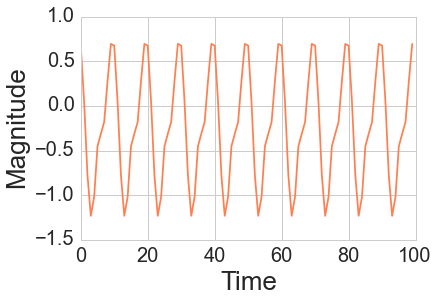

In [130]:
Color = [ 1 ,0.498039, 0.313725];
plt.plot(time_periodic,mag_periodic, color=Color)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.savefig('unfolded.png', dpi=300, format="png", transparent="True")

In [131]:
a = FATS.FeatureSpace(featureList=['PeriodLS'])
a=a.calculateFeature(lc_periodic)
print "Period calculated:", a.result(method='array'), "True Period:", Period

Period calculated: [ 10.06779661] True Period: 10


We can also confirm the validity of this result by folding the light-curve as explained in [the introduction](#foldedLC).

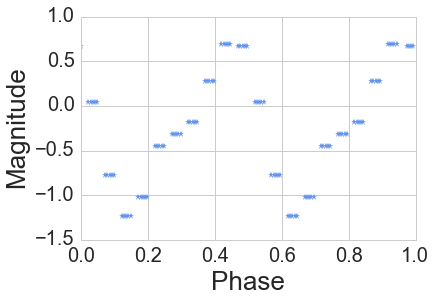

In [132]:
Color = [ 0.392157, 0.584314 ,0.929412];
T = 2 * a.result(method='array')
new_b = np.mod(time_periodic, T) / T;
idx = np.argsort(2 * new_b)
plt.plot( new_b, mag_periodic,'*', color=Color)
plt.xlabel("Phase")
plt.ylabel("Magnitude")
#plt.plot(np.sort(new_b), data3[np.argsort(new_b)],'*', color='red')
plt.savefig('folded.png', dpi=300, format="png", transparent="True")

#### Period fit

 Returns the false alarm probability of the largest periodogram value. Let's test it for a normal distributed data and for a periodic one: 

In [133]:
a = FATS.FeatureSpace(featureList=['PeriodLS','Period_fit'])
a=a.calculateFeature(lc_normal)
print "White noise data:", a.result(method='dict')

a = FATS.FeatureSpace(featureList=['PeriodLS','Period_fit'])
a=a.calculateFeature(lc_periodic)
print "Periodic data:", a.result(method='dict')

White noise data: {'Period_fit': 1.0, 'PeriodLS': 2.302060550247496}
Periodic data: {'Period_fit': 3.6454366928976022e-15, 'PeriodLS': 10.067796610169493}


#### $\Psi_{CS}$

$R_{CS}$ applied to the phase-folded light curve (generated using the period estimated from the Lomb-Scargle method).

In [134]:
a = FATS.FeatureSpace(featureList=['PeriodLS','Psi_CS'] )
a=a.calculateFeature(lc_periodic)
print a.result(method='dict')

{'PeriodLS': 10.067796610169493, 'Psi_CS': 0.20995003559616549}


#### Color

The color is defined as the difference between the average magnitude of two different bands observations. 

In [135]:
a = FATS.FeatureSpace(featureList=['Color'])
a=a.calculateFeature(lc)
print a.result(method='dict')

{'Color': 0.20396976753857032}


#### Autocorrelation_length

The autocorrelation, also known as serial correlation, is the cross-correlation of a signal with itself. Informally, it is the similarity between observations as a function of the time lag between them. It is a mathematical tool for finding repeating patterns, such as the presence of a periodic signal obscured by noise, or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies.

For an observed series $y_1, y_2,\dots,y_T$ with sample mean $\bar{y}$, the sample lag$-h$ autocorrelation is given by:

$$\hat{\rho}_h = \frac{\sum_{t=h+1}^T (y_t - \bar{y})(y_{t-h}-\bar{y})}{\sum_{t=1}^T (y_t - \bar{y})^2}$$

Since the autocorrelation fuction of a light curve is given by a vector and we can only return one value as a feature, we define the length of the autocorrelation function where its value is smaller than $e^{-1}$. 

In [136]:
a = FATS.FeatureSpace(featureList=['Autocor_length'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

{'Autocor_length': 1}


#### Slotted Autocorrelation 

In slotted autocorrelation, time lags are defined as intervals or slots instead of single values. The slotted autocorrelation function at a certain time lag slot is computed by averaging the cross product between samples whose time differences fall in the given slot.

$$\hat{\rho}(\tau=kh) = \frac {1}{\hat{\rho}(0)\,N_\tau}\sum_{t_i}\sum_{t_j= t_i+(k-1/2)h }^{t_i+(k+1/2)h } \bar{y}_i(t_i)\,\, \bar{y}_j(t_j) $$

Where $h$ is the slot size, $\bar{y}$ is the normalized magnitude, $\hat{\rho}(0)$ is the slotted autocorrelation for the first lag, and $N_\tau$ is the number of pairs that fall in the given slot.  In order to check the validity of this feature let's calculate the slotted autocorrelation for a normal distribution with T=1 and compare it with the autocorrelation function. These two should be equivalent in this case where the time intervals are constant.

In [137]:
def slotted_autocorrelation(mag, time, T, K, second_round=False, K1=100):
    
        slots = np.zeros((K,1))
        i=1

        # make time start from 0
        time = time - np.min(time)

        # subtract mean from mag values
        m = np.mean(mag)
        mag = mag - m

        prod = np.zeros((K,1))
        pairs = np.subtract.outer(time, time)
        pairs[np.tril_indices_from(pairs)] = 10000000

        ks = np.int64(np.floor(np.abs(pairs)/T + 0.5))

        #We calculate the slotted autocorrelation for k=0 separately
        idx = np.where(ks==0)
        prod[0] = (sum(mag**2) + sum(mag[idx[0]]*mag[idx[1]])) / (len(idx[0]) + len(mag))
        slots[0] = 0

        #We calculate it for the rest of the ks
        if second_round == False:
            for k in np.arange(1, K):
                idx = np.where(ks==k)
                if len(idx[0]) != 0:
                    prod[k] = sum(mag[idx[0]]*mag[idx[1]]) / (len(idx[0]))
                    slots[i] = k
                    i = i + 1
                else:
                    prod[k] = np.infty
        else:
            for k in np.arange(K1, K):
                idx = np.where(ks==k)
                if len(idx[0]) != 0:
                    prod[k] = sum(mag[idx[0]]*mag[idx[1]]) / (len(idx[0]))
                    slots[i-1] = k
                    i= i+1
                else:
                    prod[k] = np.infty
            np.trim_zeros(prod, trim='b')

        slots = np.trim_zeros(slots, trim='b')
        return prod/prod[0]

In [138]:
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20) 

plt.rc={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 16.0, 'axes.titlesize': 16}
plt.rcParams.update(**rc)

Color = [ 0.392157, 0.584314 ,0.929412];
Color2 = [ 1 ,0.498039, 0.313725];
plt.figure(figsize=(10,5))
plt.xlabel("Lag")
plt.ylabel(r'$\rho$')
#SAC = slotted_autocorrelation(mag_normal, time_normal, 1, 100)
a, = plt.plot(SAC[0:40], '*', color=Color, markersize=10)
#AC = stattools.acf(mag_normal)
b, = plt.plot(AC, color=Color2)
plt.legend([a, b],['Slotted autocorrelation', 'Autocorrelation'], fontsize=16)
#plt.savefig('slottedA.png', dpi=300, format="png", transparent="True",bbox_inches='tight')

TypeError: update() argument after ** must be a mapping, not function

In [ ]:
AC = stattools.acf(mag_normal)
k = next((index for index,value in enumerate(AC) if value < np.exp(-1)), None)
print "From the autocorrelation function:", k

a = FATS.FeatureSpace(featureList=['SlottedA_length'] , SlottedA_length = 1)
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Stetson K, Stetson K_AC, Stetson J and Stetson L

These three features are based on the Welch/Stetson variability index $I$ (Stetson, 1996) defined by the equation:
$$ I = \sqrt{\frac{1}{n(n-1)}} \sum_{i=1}^n {\left( \frac{b_i-\hat{b}}{\sigma_{b,i}}\right) \left( \frac{v_i - \hat{v}}{\sigma_{v,i}} \right)} $$

where $b_i$ and $v_i$ are the apparent magnitudes obtained for the candidate star in two observations closely spaced in time on some occasion $i$, $\sigma_{b,i}$ and $\sigma_{v,i}$ are the standard errors of those magnitudes, $\hat{b}$ and $\hat{v}$ are the weighted mean magnitudes in the two filters, and $n$ is the number of observation pairs.

Since a given frame pair may include data from two filters which did not have equal numbers of observations overall, the "relative error" is calculated as follows:

$$ \delta = \sqrt{\frac{n}{n-1}} \frac{v-\hat{v}}{\sigma_v} $$

allowing all residuals to be compared on an equal basis. 

##### - Stetson K

Stetson K is a robust kurtosis measure:
$$ \frac{1/N \sum_{i=1}^N |\delta_i|}{\sqrt{1/N \sum_{i=1}^N \delta_i^2}}$$

where the index $i$ runs over all $N$ observations available for the star without regard to pairing. For a Gaussian magnitude distribution K should take a value close to $\sqrt{2/\pi} = 0.798$, let's test it:

In [ ]:
a = FATS.FeatureSpace(featureList=['StetsonK' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

##### - Stetson K_AC

Stetson K applied to the slotted autocorrelation function of the light-curve.

In [ ]:
a = FATS.FeatureSpace(featureList=['SlottedA_length','StetsonK_AC' ])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

##### - Stetson J

Stetson J is a robust version of the variability index. It is calculated based on two simultaneous light curves of a same star and is defined as:

$$ J =  \sum_{k=1}^n  sgn(P_k) \sqrt{|P_k|}$$

with $P_k = \delta_{i_k} \delta_{j_k} $

For a Gaussian magnitude distribution, J should take a value close to zero:

In [ ]:
a = FATS.FeatureSpace(featureList=['StetsonJ' ])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

##### - Stetson L

Stetson L variability index describes the synchronous variability of different bands and is defined as:
$$ L = \frac{JK}{0.798} $$

Again, for a Gaussian magnitude distribution, L should take a value close to zero:

In [ ]:
a = FATS.FeatureSpace(featureList=['StetsonL' ])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Variability index $\eta$ REMOVED FROM THE LIBRARY

Variability index $\eta$ is the ratio of the mean of the square of successive differences to the variance of data points. The index was originally proposed to check whether the successive data points are independent or not. In other words, the index was developed to check if any trends exist in the data (von Neumann 1941). It is defined as:
$$\eta=\frac{1}{\left(N-1 \right)\sigma^2}\sum_{i=1}^{N-1} \left( m_{i+1}-m_i \right)^2 $$

The variability index should take a value close to 2 for a normal distribution.

This feature was removed from the library because it does not take into account unequal sampling.

In [ ]:
a = FATS.FeatureSpace(featureList=['VariabilityIndex' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Variability index $\eta^e$

Although $\eta$ is a powerful index for quantifying variability characteristics of a time series, it does not take into account unequal sampling. Thus $\eta^e$ is defined as:

$$ \eta^e = \bar{w} \, \left( t_{N-1} - t_1 \right)^2 \frac{\sum_{i=1}^{N-1} w_i \left(m_{i+1} - m_i \right)^2}{\sigma^2 \sum_{i=1}^{N-1} w_i} $$

$$ w_i = \frac{1}{\left( t_{i+1} - t_i \right)^2} $$

In [ ]:
a = FATS.FeatureSpace(featureList=['Eta_e' ])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

In [ ]:
mag_normal2 = 1000 * np.random.normal(size=1000, scale = 25)
time_normal2 = np.arange(1000)

lc_normal2 = np.array([mag_normal2, time_normal2])


In [ ]:
a = FATS.FeatureSpace(featureList=['Eta_e' ])
a=a.calculateFeature(lc_normal2)
print a.result(method='dict')

#### Variability index $\eta_{color}$

$\eta^e$ index calculated from the color light-curve.

In [ ]:
a = FATS.FeatureSpace(featureList=['Eta_color' ])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### $\Psi_\eta$

$\eta^e$ index calculated from the folded light curve.

In [ ]:
a = FATS.FeatureSpace(featureList=['PeriodLS','Psi_eta'])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Small Kurtosis

Small sample kurtosis of the magnitudes:
$$ Kurtosis = \frac{N \left( N+1 \right)}{\left( N-1 \right) \left( N-2 \right) \left( N-3 \right)} \sum_{i=1}^N \left( \frac{m_i-\hat{m}}{\sigma} \right)^4 - \frac{3\left( N-1 \right)^2}{\left( N-2 \right) \left( N-3 \right)} $$

For a normal distribution, the small kurtosis should be zero:

In [ ]:
a = FATS.FeatureSpace(featureList=['SmallKurtosis' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Skewness

The skewness of a sample is defined as follow:
$$ Skewness = \frac{N}{\left(N-1\right)\left(N-2\right)} \sum_{i=1}^N \left( \frac{m_i-\hat{m}}{\sigma}\right)^3 $$

For a normal distribution it should be equal to zero:

In [ ]:
a = FATS.FeatureSpace(featureList=['Skew' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Median absolute deviation

The median absolute deviation is defined as the median discrepancy of the data from the median data:

$$Median Absolute Deviation = median\left( |mag - median(mag)|\right) $$

It should take a value close to 0.675 for a normal distribution:

In [ ]:
a = FATS.FeatureSpace(featureList=['MedianAbsDev' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Amplitude

The amplitude is defined as the half of the difference between the median of the maximum 5% and the median of the minimum 5% magnitudes.
For a sequence of numbers from 0 to 1000 the amplitude should be equal to 475.5:

In [ ]:
a = FATS.FeatureSpace(featureList=['Amplitude' ] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Con

Index introduced for the selection of variable stars from the OGLE database (Wozniak 2000). To calculate Con, we count the number of three consecutive data points that are brighter or fainter than $2\sigma$ and normalize the number by $N-2$. 

For a normal distribution and by considering just one star, Con should take values close to 0.045:

In [ ]:
a = FATS.FeatureSpace(featureList=['Con' ] , Con=1)
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Anderson-Darling test

The Anderson-Darling test is a statistical test of whether a given sample of data is drawn from a given probability distribution. When applied to testing  if a normal distribution adequately describes a set of data, it is one of the most powerful statistical tools for detecting most departures from normality.

For a normal distribution the Anderson-Darling statistic should take values close to 0.25:

In [ ]:
b=[]
for i in xrange(5000):
    data2 = np.random.normal(size=10000)
    a = FATS.FeatureSpace(featureList=['AndersonDarling' ] )
    a=a.calculateFeature(data2)
    b.extend(a.result())
    
fig = plt.hist(b)

#### Linear trend

Slope of a linear fit to the light-curve. 

In [ ]:
a = FATS.FeatureSpace(featureList=['LinearTrend'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Max slope 

Maximum absolute magnitude slope between two consecutive observations.

In [ ]:
a = FATS.FeatureSpace(featureList=['MaxSlope'])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Beyond 1 std 

Percentage of points beyond one standard deviation from the weighted mean.

For a normal distribution, it should take a value close to 0.32:

In [ ]:
a = FATS.FeatureSpace(featureList=['Beyond1Std'])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Pair slope trend

Considering the last 30 (time-sorted) measurements of source magnitude, the fraction of increasing first differences minus the fraction of decreasing first differences.

In [ ]:
a = FATS.FeatureSpace(featureList=['PairSlopeTrend'])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Flux percentile ratio mid20, mid 35, mid 50, mid 65 and mid 80 

In order to caracterize the sorted magnitudes distribution we use percentiles. If $F_{5,95}$ is the difference between $95\%$ and $5\%$ magnitude values, we calculate the following:
- flux_percentile_ratio_mid20: ratio $F_{40,60}/F_{5,95}$ 
- flux_percentile_ratio_mid35: ratio $F_{32.5,67.5}/F_{5,95}$ 
- flux_percentile_ratio_mid50: ratio $F_{25,75}/F_{5,95}$
- flux_percentile_ratio_mid65: ratio $F_{17.5,82.5}/F_{5,95}$ 
- flux_percentile_ratio_mid80: ratio $F_{10,90}/F_{5,95}$


For the first feature for example, in the case of a normal distribution, this is equivalente to calculate $\frac{erf^{-1}(2 \cdot 0.6-1)-erf^{-1}(2 \cdot 0.4-1)}{erf^{-1}(2 \cdot 0.95-1)-erf^{-1}(2 \cdot 0.05-1)}$. So, the expected values for each of the flux percentile features are:

- flux_percentile_ratio_mid20 = 0.154
- flux_percentile_ratio_mid35 = 0.275 
- flux_percentile_ratio_mid50 = 0.410
- flux_percentile_ratio_mid65 = 0.568
- flux_percentile_ratio_mid80 = 0.779

In [ ]:
a = FATS.FeatureSpace(featureList=['FluxPercentileRatioMid20','FluxPercentileRatioMid35','FluxPercentileRatioMid50','FluxPercentileRatioMid65','FluxPercentileRatioMid80'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Percent difference flux percentile

Ratio of $F_{5,95}$ over the median magnitude.

In [ ]:
a = FATS.FeatureSpace(featureList=['PercentDifferenceFluxPercentile'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### $Q_{3-1}$

$Q_{3-1}$ is the difference between the third quartile, $Q_3$, and the first quartile, $Q_1$, of a raw light curve. $Q_1$ is a split between the lowest $25\%$ and the highest $75\%$ of data. $Q_3$ is a split between the lowest $75\%$ and the highest $25\%$ of data.

In [ ]:
a = FATS.FeatureSpace(featureList=['Q31'])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### $Q_{3-1|B-R}$

$Q_{3-1}$ applied to the difference between both bands of a light curve (B-R).

In [ ]:
a = FATS.FeatureSpace(featureList=['Q31_color'])
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Percent amplitude

Largest percentage difference between either the max or min magnitude and the median.

In [ ]:
a = FATS.FeatureSpace(featureList=['PercentAmplitude'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### Mean variance $\frac{\sigma}{\bar{m}}$ 

This is a simple variability index and is defined as the ratio of the standard deviation, $\sigma$, to the mean magnitude, $\bar{m}$. If a light curve has strong variability, $\frac{\sigma}{\bar{m}}$ of the light curve is generally large.

For a uniform distribution the mean-variance should take a value close to 0.577:

In [ ]:
a = FATS.FeatureSpace(featureList=['Meanvariance'] )
a=a.calculateFeature(lc_uniform)
print a.result(method='dict')

#### Median buffer range percentage (MedianBRP)

Fraction of photometric points within amplitude/10 of the median magnitude.

In [ ]:
a = FATS.FeatureSpace(featureList=['MedianBRP'] )
a=a.calculateFeature(lc_normal)
print a.result(method='dict')

#### CAR features 

In order to model the irregular sampled times series we use CAR(1) (Brockwell and Davis, 2002), a continious time auto regressive model. CAR(1) process has three parameters, it provides a natural and consistent way of estimating a characteristic time scale and variance of light-curves. CAR(1) process is described by the following stochastic differential equation:

$$ dX(t) = - \frac{1}{\tau} X(t)dt + \sigma_C \sqrt{dt} \epsilon(t) + bdt, $$
$$for \: \tau, \sigma_C, t \geq 0 $$

where the mean value of the lightcurve $X(t)$ is $b\tau$ and the variance is $\frac{\tau\sigma_C^2}{2}$. $\tau$ is the relaxation time of the process $X(T)$, it can be interpreted as describing the variability amplitude of the time series. $\sigma_C$ can be interpreted as describing the variability of the time series on time scales shorter than $\tau$. $\epsilon(t)$ is a white noise process with zero mean and variance equal to one. The likelihood function of a CAR(1) model for a light-curve with observations $x - \{x_1, \dots, x_n\}$ observed at times $\{t_1, \dots, t_n\}$ with measurements error variances $\{\delta_1^2, \dots, \delta_n^2\}$ is:

$$ p \left( x|b,\sigma_C,\tau \right) = \prod_{i=1}^n \frac{1}{[2 \pi \left( \Omega_i + \delta_i^2 \right)]^{1/2}} exp \{ -\frac{1}{2} \frac{\left( \hat{x}_i - x^*_i \right)^2}{\Omega_i + \delta^2_i} \} $$
$$ x_i^* = x_i - b\tau$$
$$ \hat{x}_0 = 0 $$
$$ \Omega_0 = \frac{\tau \sigma^2_C}{2} $$
$$ \hat{x}_i = a_i\hat{x}_{i-1} + \frac{a_i \Omega_{i-1}}{\Omega_{i-1} + \delta^2_{i-1}} \left(x^*_{i-1} + \hat{x}_{i-1} \right) $$ 
$$ \Omega_i = \Omega_0 \left( 1- a_i^2 \right) + a_i^2 \Omega_{i-1} \left(1 - \frac{\Omega_{i-1}}{\Omega_{i-1} + \delta^2_{i-1}} \right) $$
$$ a_i = e^{-\left(t_i-t_{i-1}\right)/\tau} $$

To find the optimal parameters we maximize the likelihood with respect to $\sigma_C$ and $\tau$ and calculate $b$ as the mean magnitude of the light-curve divided by $\tau$.

In [ ]:
a = FATS.FeatureSpace(featureList=['CAR_sigma', 'CAR_tau','CAR_mean'])
a=a.calculateFeature(lc)
print a.result(method='dict')

#### Periodic features extracted from light-curves using generalized Lomb–Scargle (Richards et al., 2011)

Here, we adopt a model where the time series of the photometric magnitudes of variable stars is modeled as a superposition of sines and cosines:

$$y_i(t|f_i) = a_i\sin(2\pi f_i t) + b_i\cos(2\pi f_i t) + b_{i,\circ}$$

where $a$ and $b$ are normalization constants for the sinusoids of frequency $f_i$ and $b_{i,\circ}$ is the magnitude offset. 

To find periodic variations in the data, we fit the equation above by minimizing the sum of squares, which we denote $\chi^2$:

\begin{equation}
\chi^2 = \sum_k \frac{(d_k - y_i(t_k))^2}{\sigma_k^2}
\end{equation}

where $\sigma_k$ is the measurement uncertainty in data point $d_k$. We allow the mean to float, leading to more robust period estimates in the case where the periodic phase is not uniformly sampled; in these cases, the model light curve has a non-zero mean. This can be important when searching for periods on the order of the data span $T_{\textrm{tot}}$. Now, define

\begin{equation}
\chi^2_{\circ} = \sum_k \frac{(d_k - \mu)^2}{\sigma_k^2}
\end{equation}

where $\mu$ is the weighted mean

\begin{equation}
\mu = \frac{\sum_k d_k / \sigma_k^2}{\sum_k 1/\sigma_k^2}
\end{equation}

Then, the generalized Lomb-Scargle periodogram is:

\begin{equation}
P_f(f) = \frac{(N-1)}{2} \frac{\chi_{\circ}^2 - \chi_m^2(f)}{\chi_{\circ}^2}
\end{equation}

where $\chi_m^2(f)$ is $\chi^2$ minimized with respect to $a, b$, and $b_{\circ}$.

Following Debosscher et al. (2007), we fit each light curve with a linear term plus a harmonic sum of sinusoids:

\begin{equation}
y(t) = ct + \sum_{i=1}^{3}\sum_{j=1}^{4} y_i(t|jf_i)
\end{equation}

where each of the three test frequencies $f_i$ is allowed to have four harmonics at frequencies $f_{i,j} = jf_i$. The three test frequencies $f_i$ are found iteratively, by successfully finding and removing periodic signal producing a peak in $P_f(f)$, where $P_f(f)$ is the Lomb-Scargle periodogram as defined above.

Given a peak in $P_f(f)$, we whiten the data with respect to that frequency by fitting away a model containing that frequency as well as components with frequencies at 2, 3, and 4 times that fundamental frequency (harmonics). Then, we subtract that model from the data, update $\chi_{\circ}^2$, and recalculate $P_f(f)$ to find more periodic components.

Algorithm:

1) For i = {1, 2, 3}:

2) Calculate Lomb-Scargle periodogram $P_f(f)$ for light curve.

3) Find peak in $P_f(f)$, subtract that model from data.

4) Update $\chi_{\circ}^2$, return to Step 1.

Then, the features extracted are given as an amplitude and a phase:

\begin{align}
A_{i,j} &= \sqrt{a_{i,j}^2 + b_{i,j}^2}\\
\textrm{PH}_{i,j} &= \arctan\left(\frac{b_{i,j}}{a_{i,j}}\right)
\end{align}

where $A_{i,j}$ is the amplitude of the $j$th harmonic of the $i$th frequency component and $\textrm{PH}_{i,j}$ is the phase component, which we then correct to a relative phase with respect to the phase of the first component:

\begin{equation}
\textrm{PH}'_{i,j} = \textrm{PH}_{i,j} - \textrm{PH}_{00}
\end{equation}

and remapped to $|-\pi, +\pi|$.

##### Amplitudes $A_{i,j}$

In [ ]:
a = FATS.FeatureSpace(featureList=['PeriodLS','Freq1_harmonics_amplitude_0','Freq1_harmonics_amplitude_1','Freq1_harmonics_amplitude_2','Freq1_harmonics_amplitude_3','Freq2_harmonics_amplitude_0','Freq2_harmonics_amplitude_1','Freq2_harmonics_amplitude_2','Freq2_harmonics_amplitude_3','Freq3_harmonics_amplitude_0','Freq3_harmonics_amplitude_1','Freq3_harmonics_amplitude_2','Freq3_harmonics_amplitude_3'])
a=a.calculateFeature(lc_periodic)
Table(a)

##### Phase components $PH_{i,j}$

In [ ]:
a = FATS.FeatureSpace(featureList=['PeriodLS','Freq1_harmonics_amplitude_0','Freq1_harmonics_rel_phase_0','Freq1_harmonics_rel_phase_1','Freq1_harmonics_rel_phase_2','Freq1_harmonics_rel_phase_3','Freq2_harmonics_rel_phase_0','Freq2_harmonics_rel_phase_1','Freq2_harmonics_rel_phase_2','Freq2_harmonics_rel_phase_3','Freq3_harmonics_rel_phase_0','Freq3_harmonics_rel_phase_1','Freq3_harmonics_rel_phase_2','Freq3_harmonics_rel_phase_3'])
a=a.calculateFeature(lc_periodic)
Table(a)

## References

[1] <cite data-cite="Falk2011">Falk, M., Marohn, F., Michel, R., Hofmann, D., Macke, M., Tewes, B., ... & Englert, S. (2011). A First Course on Time Series Analysis: Examples with SAS.<a href="http://statistik.mathematik.uni-wuerzburg.de/timeseries/"> An open source book on time series analysis with SAS</a>.</cite> 

[2] <cite data-cite="Kim2008">Kim, D. W., Protopapas, P., Alcock, C., Byun, Y. I., & Bianco, F. (2009). De-Trending Time Series for Astronomical Variability Surveys. Monthly Notices of the Royal Astronomical Society, 397(1), 558-568. <a href="http://mnras.oxfordjournals.org/content/397/1/558.full.pdf+html">Doi:10.1111/j.1365-2966.2009.14967.x</a>.</cite> 

[3] <cite data-cite="Kim2011">Kim, D. W., Protopapas, P., Byun, Y. I., Alcock, C., Khardon, R., & Trichas, M. (2011). Quasi-stellar object selection algorithm using time variability and machine learning: Selection of 1620 quasi-stellar object candidates from MACHO Large Magellanic Cloud database. The Astrophysical Journal, 735(2), 68.<a href="http://www.cs.tufts.edu/~roni/PUB/QSOApJ2011.pdf"> Doi:10.1088/0004-637X/735/2/68</a>.</cite>

[4] <cite data-cite="Kim2014">Kim, D. W., Protopapas, P., Bailer-Jones, C. A., Byun, Y. I., Chang, S. W., Marquette, J. B., & Shin, M. S. (2014). The EPOCH Project: I. Periodic Variable Stars in the EROS-2 LMC Database. arXiv preprint <a href="http://dx.doi.org/10.1051/0004-6361/201323252"> Doi:10.1051/0004-6361/201323252</a>.</cite>

[5] <cite data-cite="Nun2014">Nun, I., Pichara, K., Protopapas, P., & Kim, D. W. (2014). Supervised Detection of Anomalous Light Curves in Massive Astronomical Catalogs. The Astrophysical Journal, 793(1), 23.<a href="http://iopscience.iop.org/0004-637X/793/1/23/"> Doi:10.1088/0004-637X/793/1/23</a>.</cite>

[6] <cite data-cite="Pichara2012">Pichara, K., Protopapas, P., Kim, D. W., Marquette, J. B., & Tisserand, P. (2012). An improved quasar detection method in EROS-2 and MACHO LMC data sets. Monthly Notices of the Royal Astronomical Society, 427(2), 1284-1297.<a href="http://mnras.oxfordjournals.org/content/427/2/1284"> Doi:10.1111/j.1365-2966.2012.22061.x</a>.</cite>

[7] <cite data-cite="Richards2011">Richards, J. W., Starr, D. L., Butler, N. R., Bloom, J. S., Brewer, J. M., Crellin-Quick, A., ... & Rischard, M. (2011). On machine-learned classification of variable stars with sparse and noisy time-series data. The Astrophysical Journal, 733(1), 10.<a href="http://iopscience.iop.org/0004-637X/733/1/10/"> Doi:10.1088/0004-637X/733/1/10</a>.</cite>


In [ ]:
picture = Image(filename='peanuts.jpg')
picture.size = (30, 30)
picture

<a id='Appendix'></a>

## Appendix

The following section presents the tests performed to the features in order to check their invariance to unequal sampling. To do so, we take random observations of a light-curve and compare the resulting features with the ones obtained from the original data.

In [ ]:
def Shuffle(mag, error, time, mag2, aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2):

    N = len(mag)
    shuffle = np.arange(0, N)
    index = np.random.permutation(shuffle)
    index = np.sort(index[0:N/2])
    
    mag_test = mag[index]
    time_test = time[index]
    error_test = error[index]

    N2 = len(mag2)
    shuffle2 = np.arange(0, N2)
    index2 = np.random.permutation(shuffle2)
    index2 = np.sort(index2[0:N2/2])

    mag2_test = mag2[index2]

    N3 = len(aligned_mag)
    shuffle3 = np.arange(0, N3)
    index3 = np.random.permutation(shuffle3)
    index3 = np.sort(index3[0:N3/2])

    aligned_mag_test = aligned_mag[index3]
    aligned_mag2_test = aligned_mag2[index3]
    aligned_time_test = aligned_time[index3]
    aligned_error_test = aligned_error[index3]
    aligned_error2_test = aligned_error2[index3]
    
    return mag_test, time_test, error_test, mag2_test, aligned_mag_test, aligned_mag2_test, aligned_time_test, \
    aligned_error_test, aligned_error2_test

We calculate the features values for fifty random samples of the original light-curve:

In [ ]:
features_value=[]
for i in xrange(50):
    [mag_test, time_test, error_test, mag2_test, aligned_mag_test, aligned_mag2_test, aligned_time_test, \
     aligned_error_test, aligned_error2_test] = \
    Shuffle(mag, error, time, mag2, aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2)
    
    lc_test = np.array([mag_test, time_test, error_test, mag2_test, aligned_mag_test, aligned_mag2_test, \
                        aligned_time_test, aligned_error_test, aligned_error2_test])
    
    a = FATS.FeatureSpace(Data='all',featureList=None)
    a = a.calculateFeature(lc_test)
    features_value.append(a.result(method='array'))

We obtain the mean and standard deviation of each calculated feature:

In [ ]:
features_value2 = np.asarray(features_value)
means=[]
stds=[]
for i in xrange(len(a.result(method='features'))):
    means.append(np.mean(features_value2[:,i]))
    stds.append(np.std(features_value2[:,i]))

Original light-curve:

In [ ]:
a2 = FATS.FeatureSpace(Data='all',featureList=None)
a2 =a2.calculateFeature(lc)

Percentage difference between the original feature values and the ones obtained from the random sampling:

In [ ]:
b = np.divide(np.abs((means - np.asarray(a2.result(method='array')))), stds) 
import ipy_table

FeaturesList = [('Feature','Value')]

for i in xrange(len(b)):

    FeaturesList.append((a.result(method= 'features')[i], b[i]))

make_table(FeaturesList)
apply_theme('basic')

set_global_style(float_format='%0.3f')

In [144]:
a.result(method='array')
print a.result(method='features')

['Std', 'StetsonL']


In [151]:
df = pd.DataFrame(np.asarray(a.result(method='array')).reshape((1,len(a.result(method='array')))), columns = a.result(method='features'), index=[1])


In [153]:
df.head()

,Std,StetsonL
1,0.358041,1.709773


In [155]:
df.to_csv('./MACHO_ts2.csv')

In [176]:
#We open the ligth curve in two different bands
lc_B = FATS.ReadLC_MACHO('lc_213.15620.158.B.mjd') #1.3320.14 #58.6272.729 1.3444.614 1.4652.1527
lc_R = FATS.ReadLC_MACHO('lc_213.15620.158.R.mjd')

#We import the data
[mag, time, error] = lc_B.ReadLC()
[mag2, time2, error2] = lc_R.ReadLC()

#We preprocess the data
preproccesed_data = FATS.Preprocess_LC(mag, time, error)
[mag, time, error] = preproccesed_data.Preprocess()

preproccesed_data = FATS.Preprocess_LC(mag2, time2, error2)
[mag2, time2, error2] = preproccesed_data.Preprocess()

#We synchronize the data
if len(mag) != len(mag2):
    [aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2] = \
    FATS.Align_LC(time, time2, mag, mag2, error, error2)
    
lc = np.array([mag, time, error, mag2, aligned_mag, aligned_mag2, aligned_time, aligned_error, aligned_error2])

In [178]:
a2 = FATS.FeatureSpace(Data='all',featureList=None)
a2 =a2.calculateFeature(lc)
Table(a2)

Feature,Value
Amplitude,0.09900
AndersonDarling,1.00000
Autocor_length,29.00000
Beyond1Std,0.30094
CAR_mean,-0.10994
CAR_sigma,0.00748
CAR_tau,66.28009
Color,0.02369
Con,0.00587
Eta_color,917.37643


In [173]:
import numpy as np


def alinear(mjd, mjd2, data, data2, error, error2):

    if len(data2) > len(data):
        
        print 'caso1'

        new_data2 = []
        new_error2 = []
        new_mjd2 = []
        new_mjd = np.copy(mjd)
        new_error = np.copy(error)
        new_data = np.copy(data)
        count = 0

        for index in xrange(len(data)):

            where = np.where(mjd2 == mjd[index])

            if np.array_equal(where[0], []) is False:

                new_data2.append(data2[where])
                new_error2.append(error2[where])
                new_mjd2.append(mjd2[where])
            else:
                new_mjd = np.delete(new_mjd, index - count)
                new_error = np.delete(new_error, index - count)
                new_data = np.delete(new_data, index - count)
                count = count + 1

        new_data2 = np.asarray(new_data2).flatten()
        new_error2 = np.asarray(new_error2).flatten()


    else:
        print caso2

        new_data = []
        new_error = []
        new_mjd = []
        new_mjd2 = np.copy(mjd2)
        new_error2 = np.copy(error2)
        new_data2 = np.copy(data2)
        count = 0
        for index in xrange(len(data2)):
            where = np.where(mjd == mjd2[index])

            if np.array_equal(where[0], []) is False:
                new_data.append(data[where])
                new_error.append(error[where])
                new_mjd.append(mjd[where])
            else:
                new_mjd2 = np.delete(new_mjd2, (index - count))
                new_error2 = np.delete(new_error2, (index - count))
                new_data2 = np.delete(new_data2, (index - count))
                count = count + 1

        new_data = np.asarray(new_data).flatten()
        new_mjd = np.asarray(new_mjd).flatten()
        new_error =  np.asarray(new_error).flatten()

    return new_data, new_data2, new_mjd, new_error, new_error2
    #return new_mjd, new_data, new_error, new_mjd2, new_data2, new_error2


In [174]:
[new_data, new_data2, new_mjd, new_error, new_error2] = alinear(time, time2, mag, mag2, error, error2)

caso1


In [175]:
print new_error2

[ 0.015  0.046  0.024  0.03   0.017  0.022  0.026  0.021  0.029  0.02
  0.032  0.023  0.022  0.016  0.025  0.025  0.018  0.024  0.022  0.019
  0.028  0.027  0.017  0.032  0.017  0.02   0.049  0.023  0.031  0.019
  0.016  0.021  0.033  0.016  0.018  0.017  0.038  0.033  0.022  0.012
  0.015  0.017  0.017  0.032  0.011  0.018  0.013  0.019  0.013  0.014
  0.023  0.026  0.029  0.025  0.018  0.024  0.023  0.027  0.034  0.042
  0.023  0.025  0.025  0.012  0.023  0.031  0.022  0.054  0.035  0.042
  0.026  0.037  0.034  0.018  0.023  0.026  0.03   0.03   0.022  0.034
  0.015  0.017  0.018  0.017  0.02   0.024  0.028  0.027  0.03   0.028
  0.026  0.021  0.045  0.027  0.025  0.027  0.026  0.012  0.014  0.012
  0.027  0.02   0.035  0.032  0.029  0.017  0.029  0.063  0.026  0.021
  0.027  0.025  0.017  0.032  0.02   0.021  0.039  0.013  0.017  0.035
  0.021  0.013  0.015  0.028  0.022  0.017  0.01   0.013  0.009  0.01
  0.015  0.014  0.014  0.02   0.032  0.024  0.024  0.012  0.013  0.035
  0.029 